# Notes/Scratch

#### A place to play around/do scratch coding for random issues/things that pop in my head

### 7/5 - Did I fix the asymptotic independence code bug?

##### n = 1000

In [ ]:
bootstrap_data_g_1000 <- readRDS('/global/u1/j/jbbutler/isolines_uq/sims/bootstrap_experiments/bivariate_gauss/1000bigger_bivgauss_bootstrap.RData')

In [3]:
# source functions
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/orig_isolines.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/utils.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/confidenceRegions.R')

In [ ]:
x2 <- 2.61
alpha <- 0.05

# for every sample size
samp_CIs <- matrix(rep(0, 2*length(bootstrap_data_g_1000)), ncol = 2)

err_inds <- c()
    
# for every simulation of that sample size
for (j in 1:length(bootstrap_data_g_1000)) {
    
    if (length(bootstrap_data_g_1000[[j]][[2]]) < 500) {
        
        err_inds <- c(j, err_inds)
        
        next
        
        }
        
    for (k in 1:length(bootstrap_data_g_1000[[1]][[2]])) {
        
        a <- bootstrap_data_g_1000[[j]][[2]][[k]]
        
        }
        
    }

In [ ]:
# indices where errors were spotted, what kinda errors?
err_inds

In [ ]:
bootstrap_data_g_1000[[err_inds[[1]]]]

In [ ]:
bootstrap_data_g_1000[[err_inds[[2]]]]

In [ ]:
bootstrap_data_g_1000[[err_inds[[3]]]]

Only 3 simulated datasets out of 1000 simulations produced a pathological bootstrap resample that made the method fail. These errors are also strikingly similar to errors I got when running with low sample sizes for the asymptotic dependent case. These errors are gone for n = 1000 for asymptotic dependence, maybe a higher threshold for consistent success than the asymptotic dependence case.

##### n = 1500

In [ ]:
bootstrap_data_g_1500 <- readRDS('/global/u1/j/jbbutler/isolines_uq/sims/bootstrap_experiments/bivariate_gauss/1500bigger_bivgauss_bootstrap.RData')




In [ ]:
x2 <- 2.61
alpha <- 0.05

# for every sample size
samp_CIs <- matrix(rep(0, 2*length(bootstrap_data_g_1500)), ncol = 2)

err_inds <- c()
    
# for every simulation of that sample size
for (j in 1:length(bootstrap_data_g_1500)) {
    
    if (length(bootstrap_data_g_1500[[j]][[2]]) < 500) {
        
        err_inds <- c(j, err_inds)
        
        next
        
        }
        
    for (k in 1:length(bootstrap_data_g_1500[[1]][[2]])) {
        
        a <- bootstrap_data_g_1500[[j]][[2]][[k]]
        
        }
        
    }

In [ ]:
# indices where errors were spotted, what kinda errors?
err_inds

No errors at all, awesome!
Any sample size less than 1500 runs risk of having some pathological samples mixed in, but even at 1000 it's still only 3/1000 that are pathological.

### 7/6: Why are so many of the BCA confidence intervals returning NA?

In [ ]:
#confints1 <- readRDS('/global/u1/j/jbbutler/isolines_uq/results/1000_563_2_3_bivt_confints.RData')
confints1 <- readRDS('/global/u1/j/jbbutler/isolines_uq/results/2000_563_2_3_bivt_confints.RData')
#confints5000 <- readRDS('/global/u1/j/jbbutler/isolines_uq/sims/bootstrap_experiments/bivariate_t/5000confints/5000_563_2_3_bivt_confints.RData')

In [ ]:
confints_bca <- lapply(seq_along(confints1), function(i) confints1[[i]][[1]])
confints_bca <- as.data.frame(do.call(rbind, confints_bca))
confints_per <- lapply(seq_along(confints1), function(i) confints1[[i]][[2]])
confints_per <- as.data.frame(do.call(rbind, confints_per))

In [ ]:
confints_bca <- lapply(seq_along(confints2000), function(i) confints2000[[i]][[1]])
confints_bca <- as.data.frame(do.call(rbind, confints_bca))
confints_per <- lapply(seq_along(confints2000), function(i) confints2000[[i]][[2]])
confints_per <- as.data.frame(do.call(rbind, confints_per))

Coverage kinda bad lowkey, might be thrown off by all of the NA? Lots of points not intersecting...

In [ ]:
sum(confints_bca$V1 < 7.09 & confints_bca$V2 > 7.09, na.rm = TRUE)/sum(!is.na(confints_bca$V1))

In [ ]:
nrow(na.omit(confints_bca))

In [ ]:
sum(confints_per$V1 < 7.09 & confints_per$V2 > 7.09, na.rm = TRUE)/sum(!is.na(confints_per$V1))


In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
dat <- readRDS('/global/homes/j/jbbutler/isolines_uq/sims/bootstrap_experiments/bivariate_t/1000sims/7_1000bigger_bivt_bootstrap.RData')


In [ ]:
out <- suppressWarnings(xContours(dat = dat[[1]], faster = TRUE, asympIndep = FALSE))$projContours

In [ ]:
data.frame(out[[2]])

In [ ]:
res10 <- bcaMethod(bootstrap_data_t_1000[[10]][[2]], bootstrap_data_t_1000[[10]][[1]], 0.05, 3, 5.63, 2, FALSE)

In [ ]:
#big_dat <- readRDS('/global/cscratch1/sd/jbbutler/sims/bootstrap_experiments/bivariate_t/5000bigger_bivt_bootstrap.RData')

for (i in 1:length(big_dat)) {
    
    dat <- big_dat[[i]]
    fname <- paste0('/global/cscratch1/sd/jbbutler/sims/bootstrap_experiments/bivariate_t/5000sims/', i, '_5000bigger_bivt_bootstrap.RData')
    saveRDS(dat, file = fname)
    
}

Maybe theres some issue with how the desnities were drawn? Isolines looking weird?

### 7/21 Making plots for presentation for group meeting with Michael

In [ ]:
library(ggplot2)

In [ ]:
pltBootDat <- function(n, sim_ind, iso_num, fixed_coord, ax, pred_coord, asympIndep) {
    
    fname <- paste0('/global/cscratch1/sd/jbbutler/sims/bootstrap_experiments/bivariate_t/', n, 'sims/', sim_ind,'_', n,'bigger_bivt_bootstrap.RData')
    
    
    if (asympIndep) {
        fname <- paste0('/global/cscratch1/sd/jbbutler/sims/bootstrap_experiments/bivariate_gauss/', n, 'sims/', sim_ind,'_', n,'bigger_bivgauss_bootstrap.RData')
    }
    
    boot_dat <- readRDS(fname)
    orig_dat <- boot_dat[[1]]
    iso_dat <- boot_dat[[2]]
    
    plt <- ggplot() + geom_point(data = data.frame(orig_dat), aes(x = X1, y = X2), alpha = 0.1) 
    
    for (i in 1:length(iso_dat)) {
        
        plt <- plt + geom_line(data = data.frame(iso_dat[[i]][[1]][[iso_num]]), aes(x = X1, y = X2), col = 'blue', alpha = 0.04)
        
        }
    
    if (ax == 1) {
        plt <- plt + geom_vline(xintercept = fixed_coord, linetype = 'dashed', col = 'red', size = 1.5)
        plt <- plt + geom_point(aes(x = fixed_coord, y = pred_coord), color = 'green', shape = 18, size = 7)
        
        }
    if (ax == 2) {
        plt <- plt + geom_hline(yintercept = fixed_coord, linetype = 'dashed', col = 'red', size = 1.5)
        plt <- plt + geom_point(aes(x = pred_coord, y = fixed_coord), color = 'green', shape = 18, size = 7)
        }
    
    title <- paste0('n = ', n, ', ', length(iso_dat), ' bootstrap samples')
    
    plt <- plt + ggtitle(title) + 
    coord_cartesian(ylim=c(0, max(orig_dat[, 2])), xlim = c(0, max(orig_dat[, 1]))) +
    theme_light() +
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
    
    return(plt)
    
}




In [ ]:
pltBootDat(n=3000, sim_ind=1, iso_num=3, fixed_coord=5.63, ax=2, pred_coord=5.63, asympIndep=FALSE)

In [ ]:
pltBootDat(n=3000, sim_ind=1, iso_num=3, fixed_coord=4.50, ax=1, pred_coord=6.38, asympIndep=FALSE)

In [ ]:
pltBootDat(n=3000, sim_ind=1, iso_num=3, fixed_coord=0, ax=2, pred_coord=7.09, asympIndep=FALSE)

In [ ]:
pltBootDat(n=3000, sim_ind=1, iso_num=3, fixed_coord=0, ax=2, pred_coord=3.09, asympIndep=TRUE)

In [ ]:
pltBootDat(n=3000, sim_ind=1, iso_num=3, fixed_coord=2.61, ax=2, pred_coord=2.61, asympIndep=TRUE)

In [ ]:
pltBootDat(n=3000, sim_ind=1, iso_num=3, fixed_coord=1.50, ax=1, pred_coord=3.05, asympIndep=TRUE)

### 7/22: code to make a plot of chi (for michael)

In [ ]:
library(evd)
library(mvtnorm)
library(ggplot2)
library(dplyr)
library(tidync)

In [ ]:
plt_df <- data.frame(a[[2]])
plt_df <- plt_df %>% mutate(quantile = a[[1]])

plt <- ggplot(plt_df) + geom_line(aes(x = quantile, y = chi), linetype = 'twodash', size = 0.7) + 
geom_line(aes(x = quantile, y = chiupp), size = 0.7) + geom_line(aes(x = quantile, y = chilow), size = 0.7) + 
geom_ribbon(aes(x = quantile, ymin = chilow, ymax = chiupp), fill = 'blue', alpha = 0.1) +
coord_cartesian(ylim=c(-1, 1), xlim = c(0, 1)) + ggtitle('chi, estimate + 95% confidence band') + theme_light() + 
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 17))

In [ ]:
plotChi <- function(netcdf_path, save_path, cols, ltype = 'twodash', lsize = 0.7, 
                    confreg_lsize = 0.7, confreg_col = 'blue', confreg_alpha = 0.1, 
                    title = 'chi, estimate + 95% confidence band', fsize_title = 17, fsize_axlabs = 20, fsize_axticks = 15) {
    
    dat <- tidync(netcdf_path)
    dat <- dat %>% hyper_tibble()
    dat <- dat[,cols]
    
    chiplot_res <- chiplot(dat, which = 1)
    graphics.off()
    plt_df <- data.frame(chiplot_res[[2]])
    plt_df <- plt_df %>% mutate(quantile = chiplot_res[[1]])
    
    plt <- ggplot(plt_df) + geom_line(aes(x = quantile, y = chi), linetype = ltype, size = lsize) + 
        geom_line(aes(x = quantile, y = chiupp), size = confreg_lsize) + geom_line(aes(x = quantile, y = chilow), size = confreg_lsize) + 
        geom_ribbon(aes(x = quantile, ymin = chilow, ymax = chiupp), fill = confreg_col, alpha = confreg_alpha) +
        coord_cartesian(ylim=c(-1, 1), xlim = c(0, 1)) + ggtitle(title) + theme_light() + 
        theme(axis.title = element_text(size = fsize_axlabs), axis.text = element_text(size = fsize_axticks), text = element_text(size = fsize_title))
    
    ggsave(save_path, plt)
}
    
    
checkNetCDFCols <- function(fpath) {
    
    dat <- tidync(path)
    dat <- dat %>% hyper_tibble()
    return(colnames(dat))
    
}  
    
    
    

In [ ]:
path <- '/global/u1/j/jbbutler/isolines_uq/data/netcdf_data/HI_EASM_hadisd.1.0.3.2014p.417800-99999.nc'

In [ ]:
plotChi(netcdf_path = path, save_path = '/global/u1/j/jbbutler/isolines_uq/chiplot.png', cols = c(3, 4))

In [ ]:
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/chiplotting.R')

In [ ]:
p <- '/global/cscratch1/sd/jbbutler/sims/bootstrap_experiments/bivariate_t/5000sims/1000boot/3_5000bigger_bivt_bootstrap.RData'

In [ ]:
a <- readRDS(p)

### 7/26: Trying to optimize time complexity of the confidence interval code

In [ ]:
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/confidenceIntervals.R')

In [ ]:
lst <- vector(mode = 'list', length = 1000)
start <- proc.time()
a <- length(lst)
proc.time() - start

Appears that the jackknifing part and the coordinate interpolation are the main slow bits. Can try:

1. Vectorizing the coordinate interpolation code
2. Find faster jackknife method
3. Find little things in the original code to make faster 

In [ ]:
p <- '/global/cscratch1/sd/jbbutler/sims/bootstrap_experiments/bivariate_t/1000sims/1000boot/3_1000bigger_bivt_bootstrap.RData'
a <- readRDS(p)

bcaMethod(a[[2]], a[[1]], 0.05, 2, 0, 2, FALSE)

### 8/10: Appears that empirical survival function is not evaluated on the full grid that is plugged into it?

### 8/11: Is plugging a pre-specified grid into kcde affecting the bias of the estimated isolines in any way?

In [2]:
library(mvtnorm)
library(ggplot2)
library(ks)
library(dplyr)

The upcoming code is just a bunch of tests I'm running to learn why exactly the function is performing in this way.

In [3]:
n <- 15000
t_dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

#### Test 1:

Draw empirical survival function without specifying a grid, and then draw empirical survival function again specifying same grid as before, all with the same dataset

In [ ]:
surv_func1 <- kcde(t_dat, gridsize = 500, tail.flag = 'upper')
grid <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
surv_func2 <- kcde(t_dat, eval.points = grid, tail.flag = 'upper')

In [ ]:
df <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
df <- data.frame(X1 = df$X1, X2 = df$X2, Z = as.vector(surv_func1$estimate))
ggplot(df %>% filter(X1 <= 4, X1 >= 0, X2 <= 4, X2 >= 0)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

In [ ]:
df <- data.frame(X1 = surv_func2$eval.point$X1, X2 = surv_func2$eval.point$X2, Z = as.vector(surv_func2$estimate))
ggplot(df %>% filter(X1 <= 4, X1 >= 0, X2 <= 4, X2 >= 0)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

In [ ]:
mean((as.vector(surv_func1$estimate) - as.vector(surv_func2$estimate))**2)

#### Conclusion:

Empirical survival functions look a bit different, and there is a difference between the two estimates (a small, nonzero MSE).

#### Test 2:

Let's see if this difference actually impacts how the uncertainty regions are drawn, or if it's small enough that we don't care (or maybe just due to rounding issues, etc.)

In [ ]:
drawBaseRegion1 <- function(dat, gridsize, alpha, p, beta_func, B) {
    # Function to draw an uncertainty region for some base isoline of a specified
    # exceedence probability (p). Uses the methods in Mammen and Polonik (2013)
    # and Coblenz et al, and also blends a bit of the code from Cooley.

    surv_func <- kcde(dat, gridsize = gridsize, tail.flag = 'upper')
    
    grid <- expand.grid(X1 = surv_func$eval.points[[1]], X2 = surv_func$eval.points[[2]])

    hhat_vals <- as.vector(-surv_func$estimate) + p
    deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

    Zs <- rep(0, B)

    for (i in 1:B) {

        boot_samp <- dat %>% sample_frac(1, replace = TRUE)
        grid_isvalid <- grid[,1] > min(boot_samp[,1]) & grid[,2] > min(boot_samp[,2])
        boot_surv_func <- kcde(boot_samp, eval.points = grid, tail.flag = 'upper')
        boot_hhat_vals <- -boot_surv_func$estimate + p
        #boot_deltamask <- abs(boot_hhat_vals) <= beta_func(nrow(dat))
        Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask & grid_isvalid]))
    }

    bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
    lower <- grid[hhat_vals > bhat,]
    upper <- grid[hhat_vals >= -bhat,]

    conf_region <- setdiff(upper, lower)
    colnames(conf_region) <- c('X1', 'X2')

    out <- list()
    out$conf_region <- conf_region
    out$alpha <- alpha
    out$data <- dat
    out$p <- p
    out$B <- B
    out$Zs <- Zs
    out$grid <- grid
    out$bhat <- bhat
    out$beta_func <- beta_func

    out$surv_func <- surv_func
    out$hhat_vals <- hhat_vals
    out$boot_hhat_vals <- boot_hhat_vals
    out$boot_samp <- boot_samp

    return(out)
}

In [ ]:
drawBaseRegion2 <- function(dat, gridsize, alpha, p, beta_func, B) {
    # Function to draw an uncertainty region for some base isoline of a specified
    # exceedence probability (p). Uses the methods in Mammen and Polonik (2013)
    # and Coblenz et al, and also blends a bit of the code from Cooley.
    
    surv_func <- kcde(dat, gridsize = gridsize, tail.flag = 'upper')
    grid <- expand.grid(X1 = surv_func$eval.points[[1]], X2 = surv_func$eval.points[[2]])

    surv_func <- kcde(dat, eval.points = grid, tail.flag = 'upper')

    hhat_vals <- -surv_func$estimate + p
    deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

    Zs <- rep(0, B)

    for (i in 1:B) {

        boot_samp <- dat %>% sample_frac(1, replace = TRUE)
        grid_isvalid <- grid[,1] > min(boot_samp[,1]) & grid[,2] > min(boot_samp[,2])
        boot_surv_func <- kcde(boot_samp, eval.points = grid, tail.flag = 'upper')
        boot_hhat_vals <- -boot_surv_func$estimate + p
        #boot_deltamask <- abs(boot_hhat_vals) <= beta_func(nrow(dat))
        Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask & grid_isvalid]))
    }

    bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
    lower <- grid[hhat_vals > bhat,]
    upper <- grid[hhat_vals >= -bhat,]

    conf_region <- setdiff(upper, lower)
    colnames(conf_region) <- c('X1', 'X2')

    out <- list()
    out$conf_region <- conf_region
    out$alpha <- alpha
    out$data <- dat
    out$p <- p
    out$B <- B
    out$Zs <- Zs
    out$grid <- grid
    out$bhat <- bhat
    out$beta_func <- beta_func

    out$surv_func <- surv_func
    out$hhat_vals <- hhat_vals
    out$boot_hhat_vals <- boot_hhat_vals
    out$boot_samp <- boot_samp

    return(out)
}


In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) (1/n)^(1/2)
B <- 500

out1 <- drawBaseRegion1(t_dat, gridsize, alpha, p, beta_n, B)

tol <- 0.001
isoline1 <- drawBivtIsoline(p = p, tol = tol, grid = out1$grid)

In [ ]:
beta_n_plt1 <- ggplot() + 
geom_point(dat = out1$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline1, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/sqrt(n)')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt1

In [ ]:
out2 <- drawBaseRegion2(t_dat, gridsize, alpha, p, beta_n, B)
tol <- 0.001
isoline2 <- drawBivtIsoline(p = p, tol = tol, grid = out2$grid)

In [ ]:
beta_n_plt2 <- ggplot() + 
geom_point(dat = out2$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline2, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/sqrt(n)')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt2

#### Conclusion:

The mismatch is significant enough to give the same bias that I had observed before. However, it looks exactly the same as it did before, when I used a different grid that I had constructed by myself and plugged into kcde to get the estimate. So, it's probably not an issue with the grid you plug in, but what happens once you plug in the grid.

I looked at the source code for kcde, and it seems that the issue maybe wrapped in the kde function. So, let's do a test to compare the output of kde, to ensure this is where the issue is happening. Then, we can isolate the problem in the source code for kde.

I trust the results for the case where we don't specify the grid, because when we don't specify the grid, the resulting estimated survival function has isoline estimates that converge to the true isoline in $n$ and are not biased. We just need to figure out why the act of plugging in a prespecified grid makes things so bad.

#### Test 3:

We compare the output of kde.

In [29]:
dens_func1 <- kde(t_dat, gridsize = 500)
grid <- expand.grid(X1 = dens_func1$eval.points[[1]], X2 = dens_func1$eval.points[[2]])
dens_func2 <- kde(t_dat, eval.points = grid)


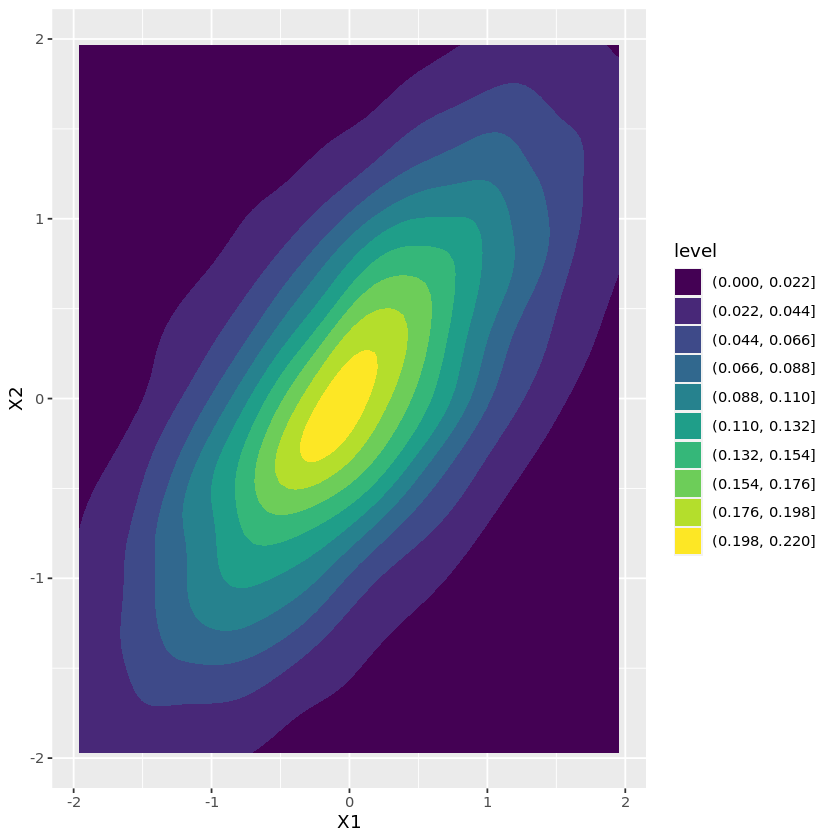

In [30]:
df <- expand.grid(X1 = dens_func1$eval.points[[1]], X2 = dens_func1$eval.points[[2]])
df <- data.frame(X1 = df$X1, X2 = df$X2, Z = as.vector(dens_func1$estimate))
ggplot(df %>% filter(X1 <= 2, X1 >= -2, X2 <= 2, X2 >= -2)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)


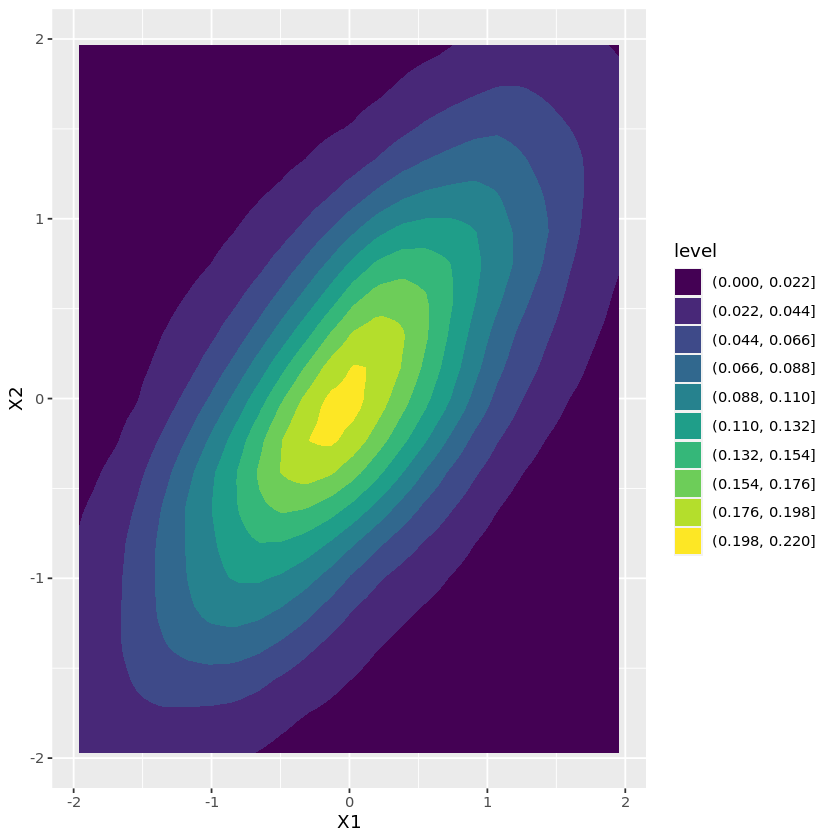

In [31]:
df <- data.frame(X1 = dens_func2$eval.point$X1, X2 = dens_func2$eval.point$X2, Z = as.vector(dens_func2$estimate))
ggplot(df %>% filter(X1 <= 2, X1 >= -2, X2 <= 2, X2 >= -2)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

Conclusion: they look sorta different, but not by much. Looked through the source code and it appears that when not specifying a grid, it just bins and returns those results, whereas if you do specify a grid, it bins but then predicts on those points. Maybe might explain these small differences.

#### Test 4

It seems that if you don't specify gridsize even though you specify eval.points, it runs to the defaults for gridsize and for the binning grid size, which are both different than $500$ as in the case where I specify gridsize. So, in either case, you end up getting different kde estimates on the binned space because the unspecified gridsize case has a binned grid resolution that is a lot coarser. So, when doing predictions on eval.points, you are predicting using different estimates/models, so you get different results. If you specify gridsize to be the same, despite plugging a grid into eval.points, you will be predicting on that grid with the same model as in the case without a specified grid. Since the grids are identical, you are calling predict on a grid for which values of the function already exist, so you will get the same values of the function on that grid. Let's check:

In [32]:
dens_func1 <- kde(t_dat, gridsize = 500)
grid <- expand.grid(X1 = dens_func1$eval.points[[1]], X2 = dens_func1$eval.points[[2]])
dens_func2 <- kde(t_dat, eval.points = grid, gridsize = 500)


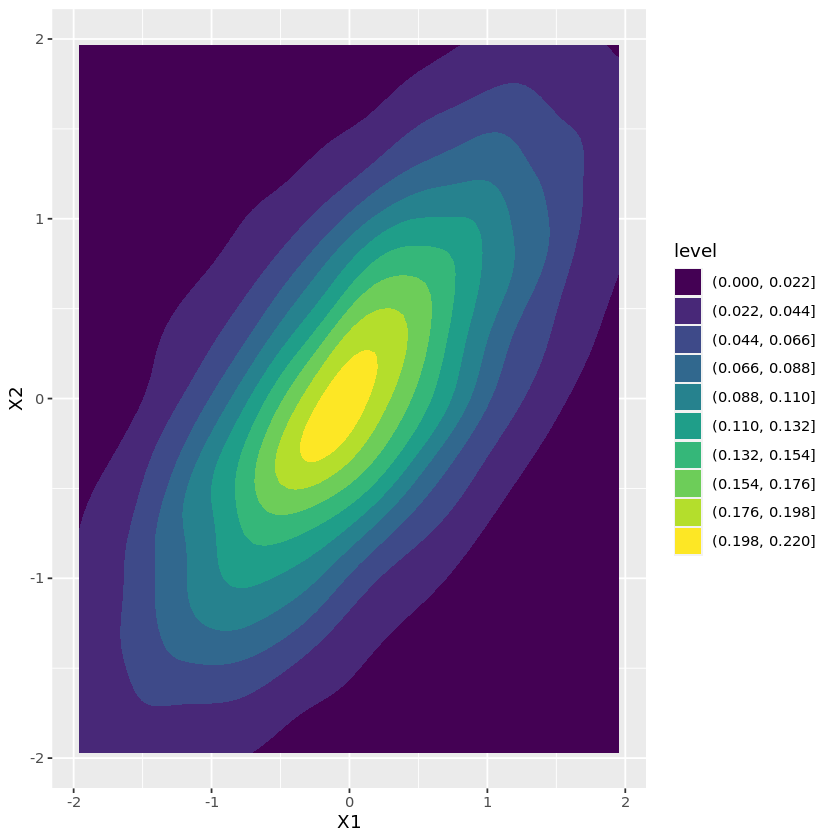

In [33]:
df <- expand.grid(X1 = dens_func1$eval.points[[1]], X2 = dens_func1$eval.points[[2]])
df <- data.frame(X1 = df$X1, X2 = df$X2, Z = as.vector(dens_func1$estimate))
ggplot(df %>% filter(X1 <= 2, X1 >= -2, X2 <= 2, X2 >= -2)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)


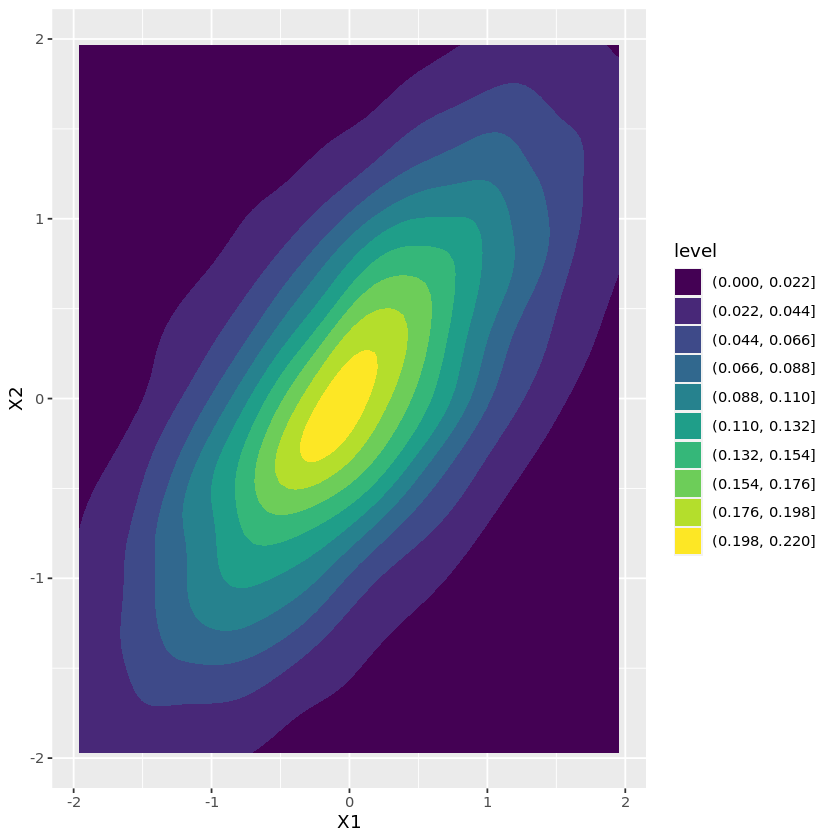

In [34]:
df <- data.frame(X1 = dens_func2$eval.point$X1, X2 = dens_func2$eval.point$X2, Z = as.vector(dens_func2$estimate))
ggplot(df %>% filter(X1 <= 2, X1 >= -2, X2 <= 2, X2 >= -2)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

In [35]:
mean((as.vector(dens_func2$estimate) - as.vector(dens_func1$estimate))**2)

[1] 3.015645e-35

#### Conclusion: 

this fixed the issue, basically the same now!

#### Test 5

Let's see if specifying gridsize magically solves our issues with the kernel survival function. If it doesn't, at least we know our density computation is correct, so there's something else hiding in the `kcde` code then.

In [38]:
surv_func1 <- kcde(t_dat, gridsize = 500, tail.flag = 'upper')
grid <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
surv_func2 <- kcde(t_dat, eval.points = grid, tail.flag = 'upper', gridsize = 500)

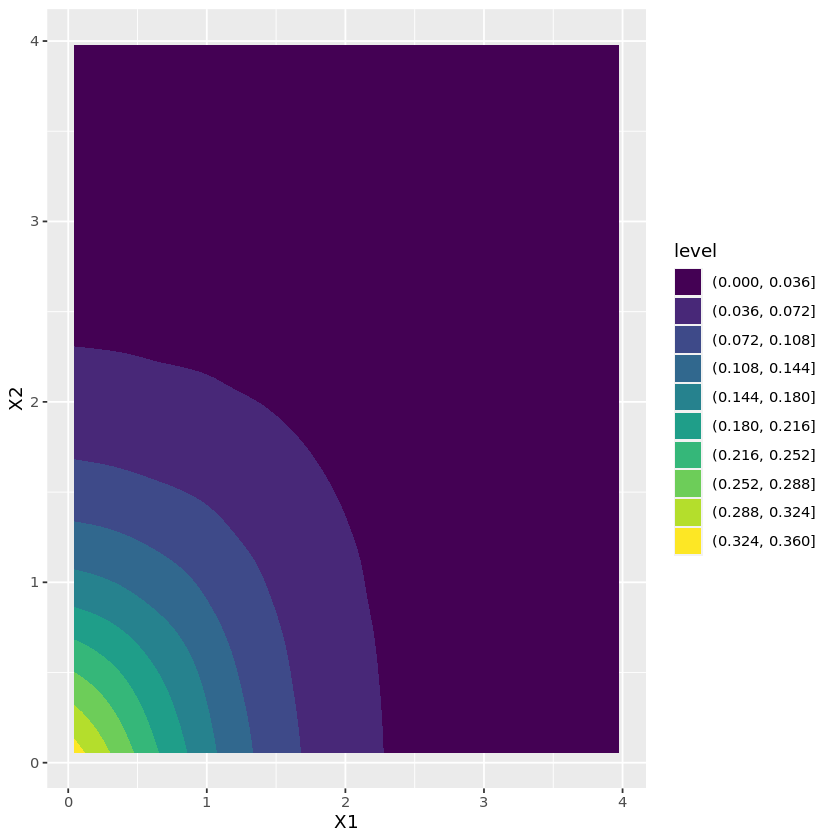

In [39]:
df <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
df <- data.frame(X1 = df$X1, X2 = df$X2, Z = as.vector(surv_func1$estimate))
ggplot(df %>% filter(X1 <= 4, X1 >= 0, X2 <= 4, X2 >= 0)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

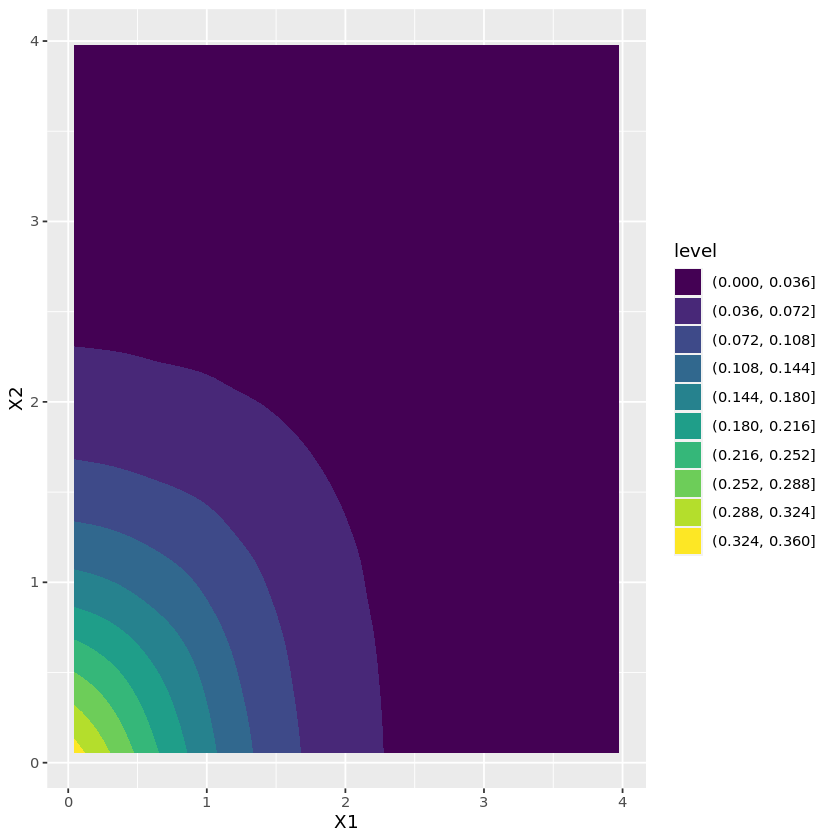

In [40]:
df <- data.frame(X1 = surv_func2$eval.point$X1, X2 = surv_func2$eval.point$X2, Z = as.vector(surv_func2$estimate))
ggplot(df %>% filter(X1 <= 4, X1 >= 0, X2 <= 4, X2 >= 0)) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

In [41]:
mean((as.vector(surv_func1$estimate) - as.vector(surv_func2$estimate))**2)

[1] 1.322268e-33

#### Conclusion: 

they are essentially the same now, yay!

#### Test 6

To top it all off, let's repeat Test 2, but specifying gridsize now. 



In [44]:
drawBaseRegion1 <- function(dat, gridsize, alpha, p, beta_func, B) {
    # Function to draw an uncertainty region for some base isoline of a specified
    # exceedence probability (p). Uses the methods in Mammen and Polonik (2013)
    # and Coblenz et al, and also blends a bit of the code from Cooley.

    surv_func <- kcde(dat, gridsize = gridsize, tail.flag = 'upper')
    
    grid <- expand.grid(X1 = surv_func$eval.points[[1]], X2 = surv_func$eval.points[[2]])

    hhat_vals <- as.vector(-surv_func$estimate) + p
    deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

    Zs <- rep(0, B)

    for (i in 1:B) {

        boot_samp <- dat %>% sample_frac(1, replace = TRUE)
        grid_isvalid <- grid[,1] > min(boot_samp[,1]) & grid[,2] > min(boot_samp[,2])
        boot_surv_func <- kcde(boot_samp, eval.points = grid, tail.flag = 'upper')
        boot_hhat_vals <- -boot_surv_func$estimate + p
        #boot_deltamask <- abs(boot_hhat_vals) <= beta_func(nrow(dat))
        Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask & grid_isvalid]))
    }

    bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
    lower <- grid[hhat_vals > bhat,]
    upper <- grid[hhat_vals >= -bhat,]

    conf_region <- setdiff(upper, lower)
    colnames(conf_region) <- c('X1', 'X2')

    out <- list()
    out$conf_region <- conf_region
    out$alpha <- alpha
    out$data <- dat
    out$p <- p
    out$B <- B
    out$Zs <- Zs
    out$grid <- grid
    out$bhat <- bhat
    out$beta_func <- beta_func

    out$surv_func <- surv_func
    out$hhat_vals <- hhat_vals
    out$boot_hhat_vals <- boot_hhat_vals
    out$boot_samp <- boot_samp

    return(out)
}

In [45]:
drawBaseRegion2 <- function(dat, gridsize, alpha, p, beta_func, B) {
    # Function to draw an uncertainty region for some base isoline of a specified
    # exceedence probability (p). Uses the methods in Mammen and Polonik (2013)
    # and Coblenz et al, and also blends a bit of the code from Cooley.
    
    surv_func <- kcde(dat, gridsize = gridsize, tail.flag = 'upper')
    grid <- expand.grid(X1 = surv_func$eval.points[[1]], X2 = surv_func$eval.points[[2]])

    surv_func <- kcde(dat, eval.points = grid, tail.flag = 'upper', gridsize = gridsize)

    hhat_vals <- -surv_func$estimate + p
    deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

    Zs <- rep(0, B)

    for (i in 1:B) {

        boot_samp <- dat %>% sample_frac(1, replace = TRUE)
        grid_isvalid <- grid[,1] > min(boot_samp[,1]) & grid[,2] > min(boot_samp[,2])
        boot_surv_func <- kcde(boot_samp, eval.points = grid, tail.flag = 'upper')
        boot_hhat_vals <- -boot_surv_func$estimate + p
        #boot_deltamask <- abs(boot_hhat_vals) <= beta_func(nrow(dat))
        Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask & grid_isvalid]))
    }

    bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
    lower <- grid[hhat_vals > bhat,]
    upper <- grid[hhat_vals >= -bhat,]

    conf_region <- setdiff(upper, lower)
    colnames(conf_region) <- c('X1', 'X2')

    out <- list()
    out$conf_region <- conf_region
    out$alpha <- alpha
    out$data <- dat
    out$p <- p
    out$B <- B
    out$Zs <- Zs
    out$grid <- grid
    out$bhat <- bhat
    out$beta_func <- beta_func

    out$surv_func <- surv_func
    out$hhat_vals <- hhat_vals
    out$boot_hhat_vals <- boot_hhat_vals
    out$boot_samp <- boot_samp

    return(out)
}


In [46]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) (1/n)^(1/2)
B <- 500

out1 <- drawBaseRegion1(t_dat, gridsize, alpha, p, beta_n, B)

tol <- 0.001
isoline1 <- drawBivtIsoline(p = p, tol = tol, grid = out1$grid)

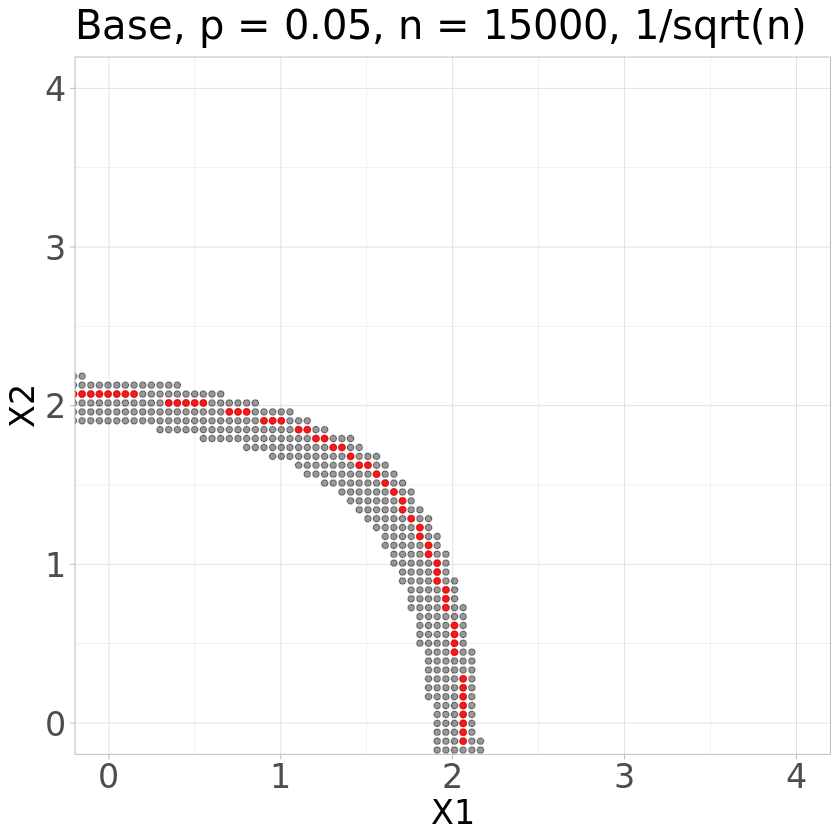

In [47]:
beta_n_plt1 <- ggplot() + 
geom_point(dat = out1$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline1, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/sqrt(n)')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt1

In [48]:
out2 <- drawBaseRegion2(t_dat, gridsize, alpha, p, beta_n, B)
tol <- 0.001
isoline2 <- drawBivtIsoline(p = p, tol = tol, grid = out2$grid)

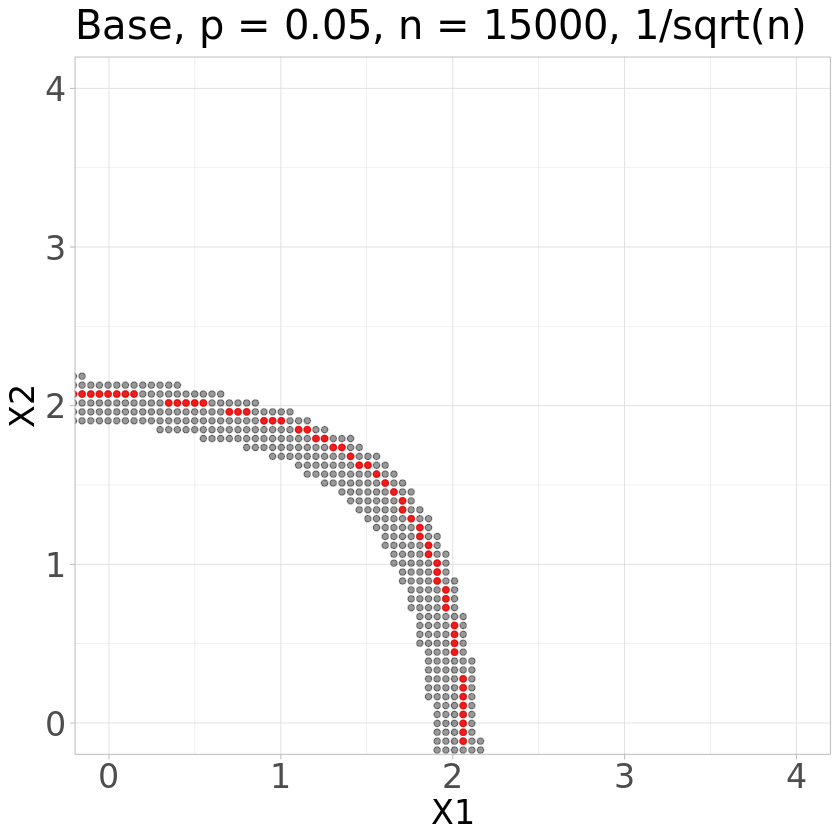

In [49]:
beta_n_plt2 <- ggplot() + 
geom_point(dat = out2$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline2, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/sqrt(n)')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt2

#### Conclusion:

Yay they're the same!

### 8/12: Given the last documented issue and its solution, does this solution also solve the issue of the bootstrap survival functions not drawing fully on the grid?

In [85]:
surv_func1 <- kcde(t_dat, gridsize = 500, tail.flag = 'upper')
grid <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
surv_func2 <- kcde(t_dat %>% sample_frac(1, replace = TRUE), eval.points = grid, tail.flag = 'upper', gridsize = 500, xmin = c(min(surv_func1$eval.points[[1]]), min(surv_func1$eval.points[[2]])), xmax = c(max(surv_func1$eval.points[[1]]), max(surv_func1$eval.points[[2]])))



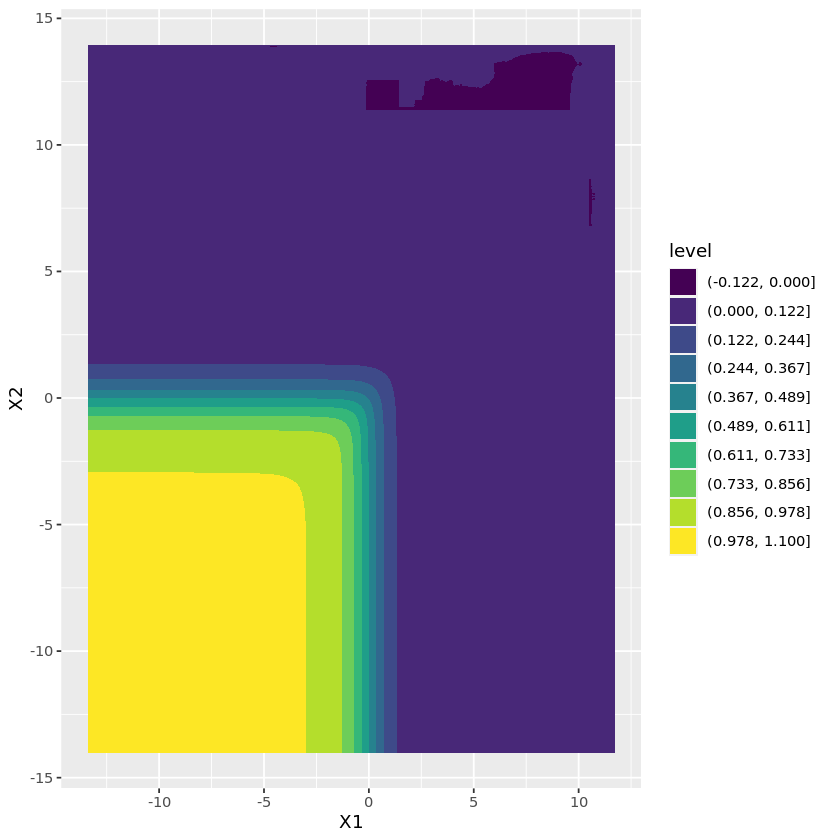

In [86]:
df <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
df <- data.frame(X1 = df$X1, X2 = df$X2, Z = as.vector(surv_func1$estimate))
ggplot(df) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

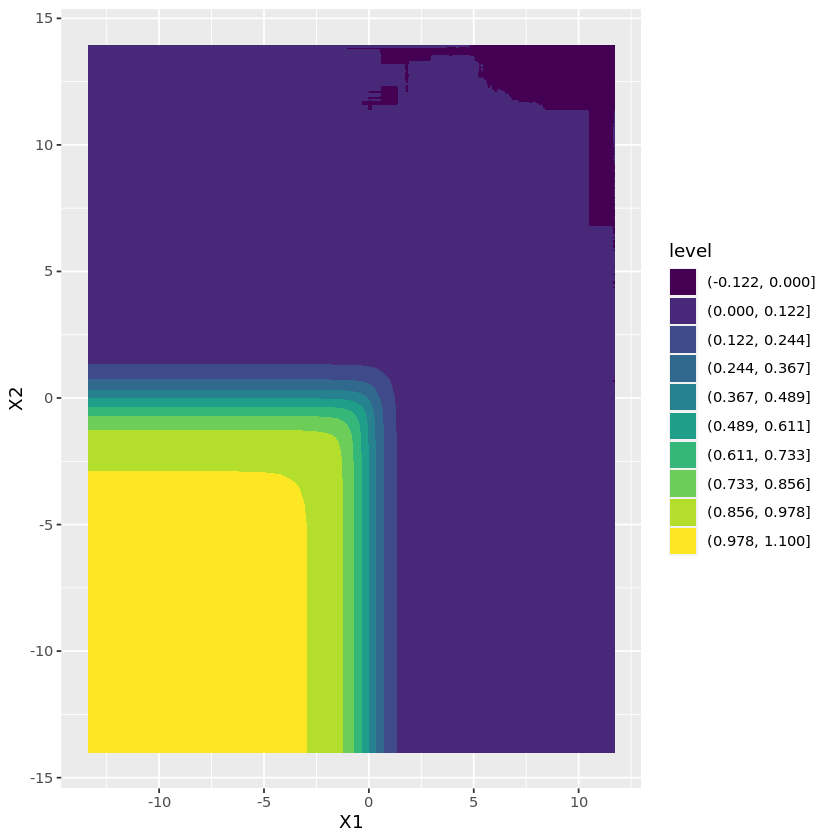

In [87]:
df <- data.frame(X1 = surv_func2$eval.point$X1, X2 = surv_func2$eval.point$X2, Z = as.vector(surv_func2$estimate))
ggplot(df) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

#### Conclusion:

Unfortunately, it does not solve it. However, if I change xmin and xmax, it does solve the issue. I think what's happening is that if you don't set xmin and xmax, they automatically get set to the min and maxs of the data along each axis, with some padding. Then the binned estimation occurs, but then you have to use the predict function to predict far out from the domain of the original model and I think it screws up then. By specifying xmin and xmax, you force it to estimate a binned kde on the whole domain space, and then it can accurately predict across the original grid.

Maybe should definitively check that everything is working, but I'll first just start re-running everything.

### 8/15 trying to find a better way to draw the isolines

Idea: draw isoline on some base grid, and then interpolate to different grids

#### Drawing/Testing Methods in General

In [3]:
library(mvtnorm)
grid <- expand.grid(X1 = seq(-5, 5, length.out = 100), X2 = seq(-5, 5, length.out = 100))
isoline <- drawBivtIsoline(p = 0.1, tol = 0.002, grid = grid)

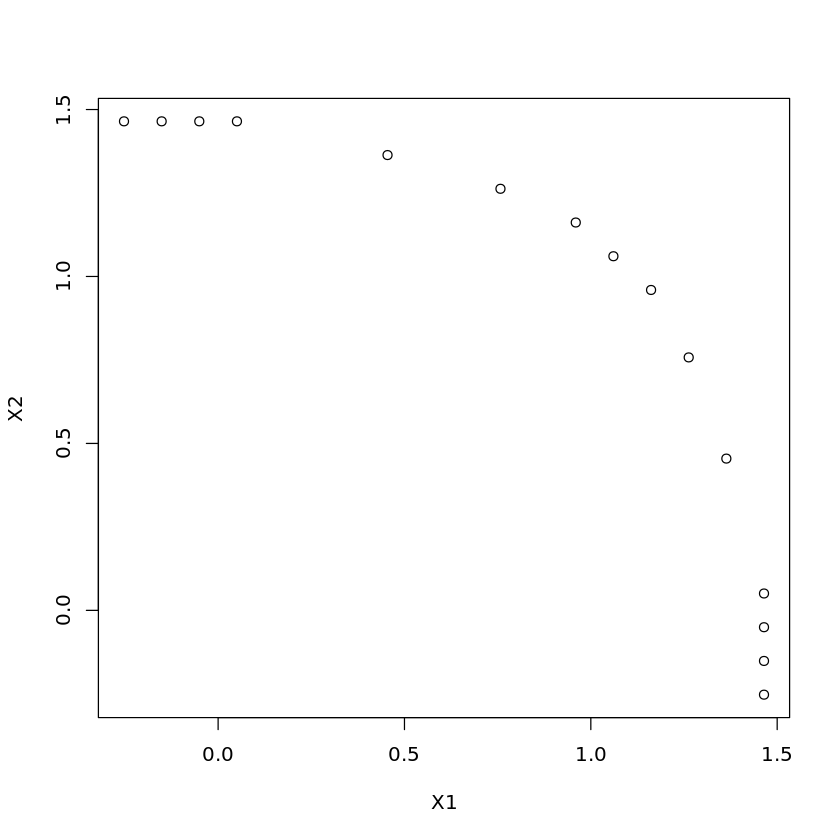

In [71]:
plot(isoline)

In [32]:
newgrid <- expand.grid(X1 = seq(0, 5.4, length.out = 200), X2 = seq(0, 5.4, length.out = 200))

In [35]:
resX1 <- approx(x = isoline$X1, y = isoline$X2, xout = newgrid$X1)$y
resX2 <- approx(x = isoline$X2, y = isoline$X1, xout = newgrid$X2)$y

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


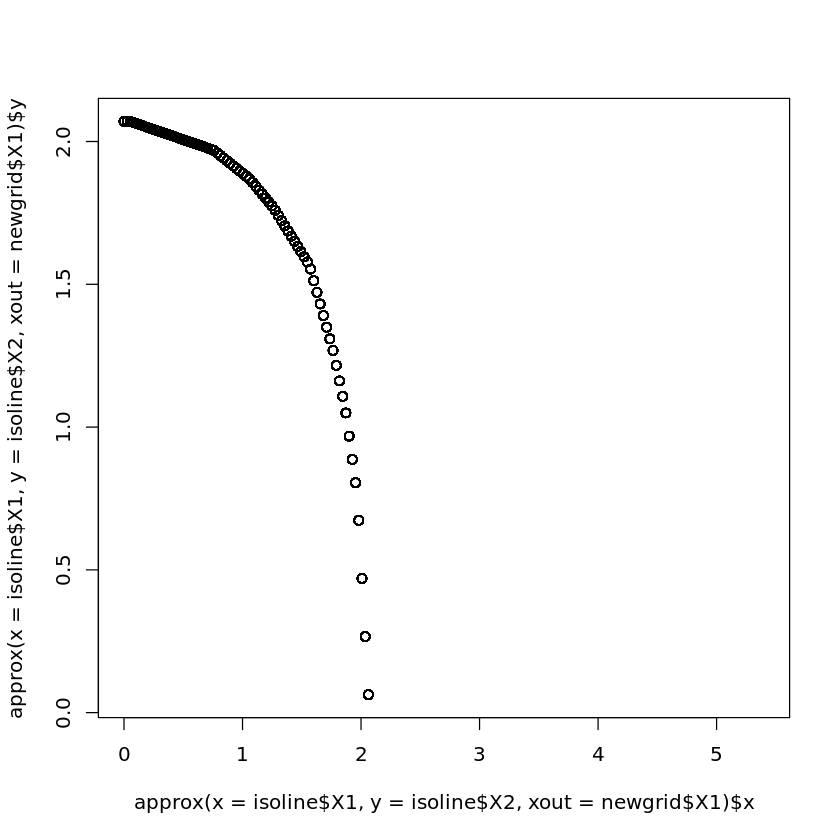

In [41]:
plot(approx(x = isoline$X1, y = isoline$X2, xout = newgrid$X1))

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


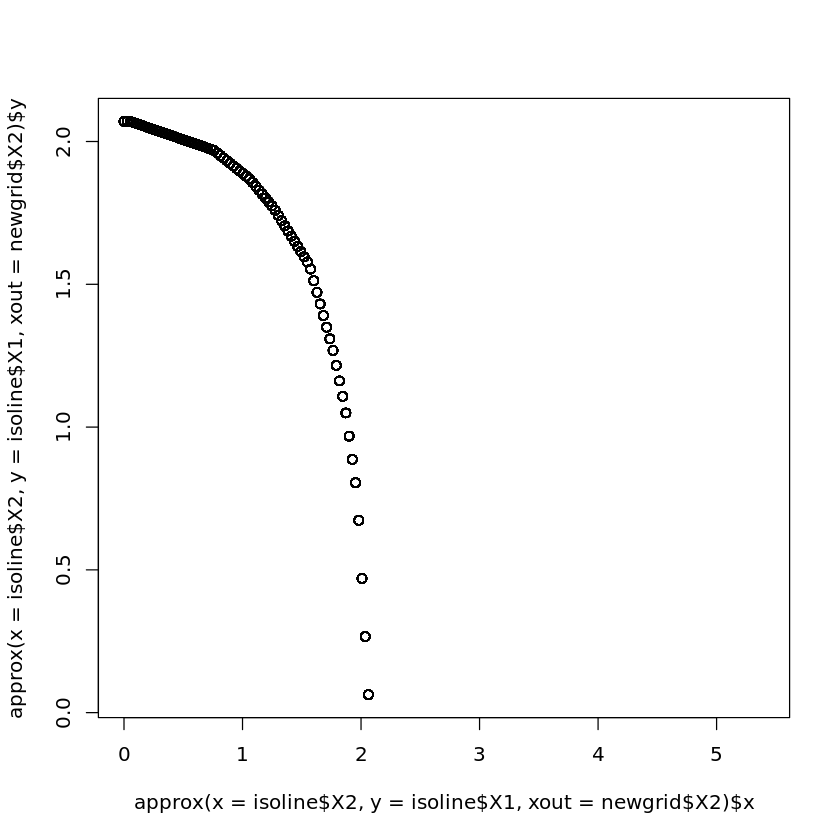

In [43]:
plot(approx(x = isoline$X2, y = isoline$X1, xout = newgrid$X2))

In [46]:
N <- 100

pts <- as.data.frame(with(isoline, list(X1 = approx(X1, n = N)$y, 
    X2 = approx(X2, n = N)$y)))

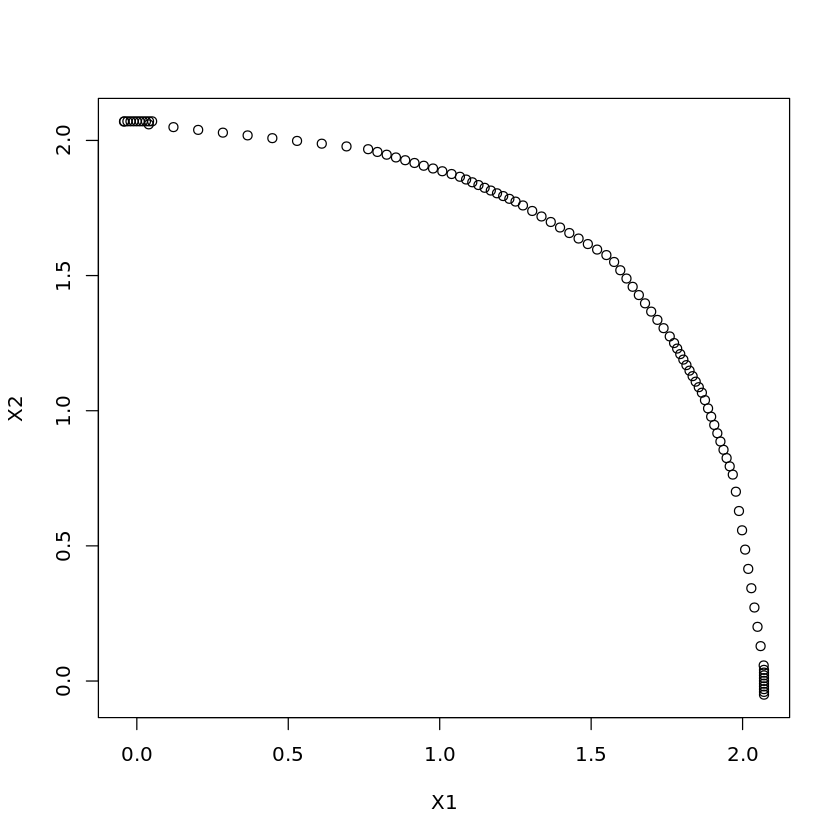

In [47]:
plot(pts)

#### Testing out in a Few Specific Problems

In [4]:
n <- 3000
t_dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
gridsize <- 500
alpha <- 0.05
p <- 0.1
beta_n <- function(n) (1/n)^(1/3)
B <- 100
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

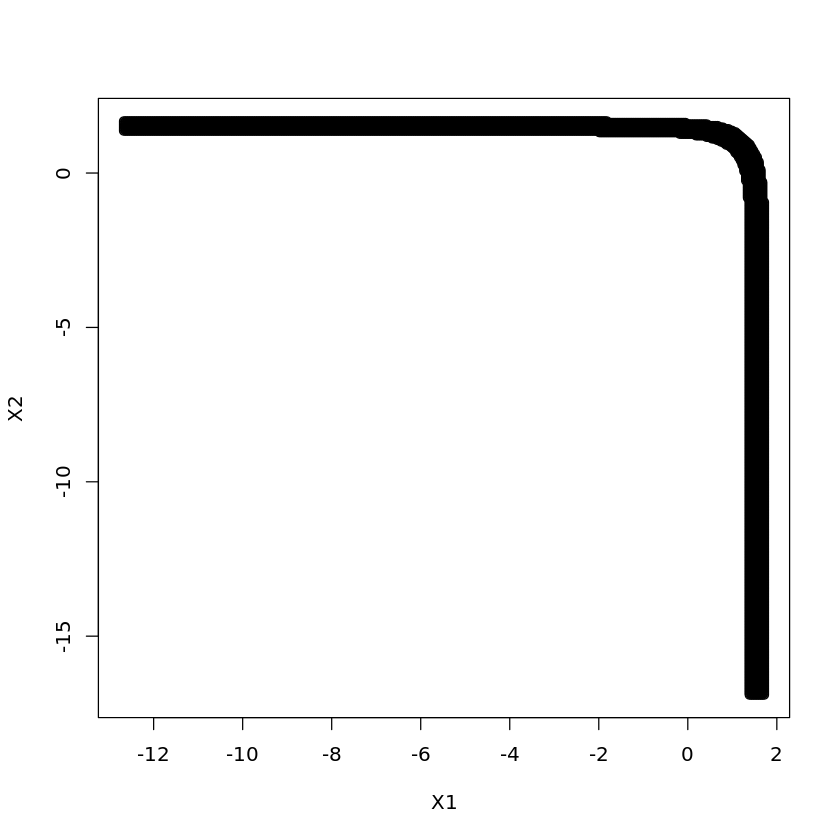

In [5]:
plot(out[[1]])

In [6]:
x1s <- unique(out$grid$X1)
x2s <- unique(out$grid$X2)


In [7]:
# making the isoline guide
grid <- expand.grid(X1 = seq(-5, 5, length.out = 100), X2 = seq(-5, 5, length.out = 100))
isoline <- drawBivtIsoline(grid = grid, tol = 0.001, p = 0.05)

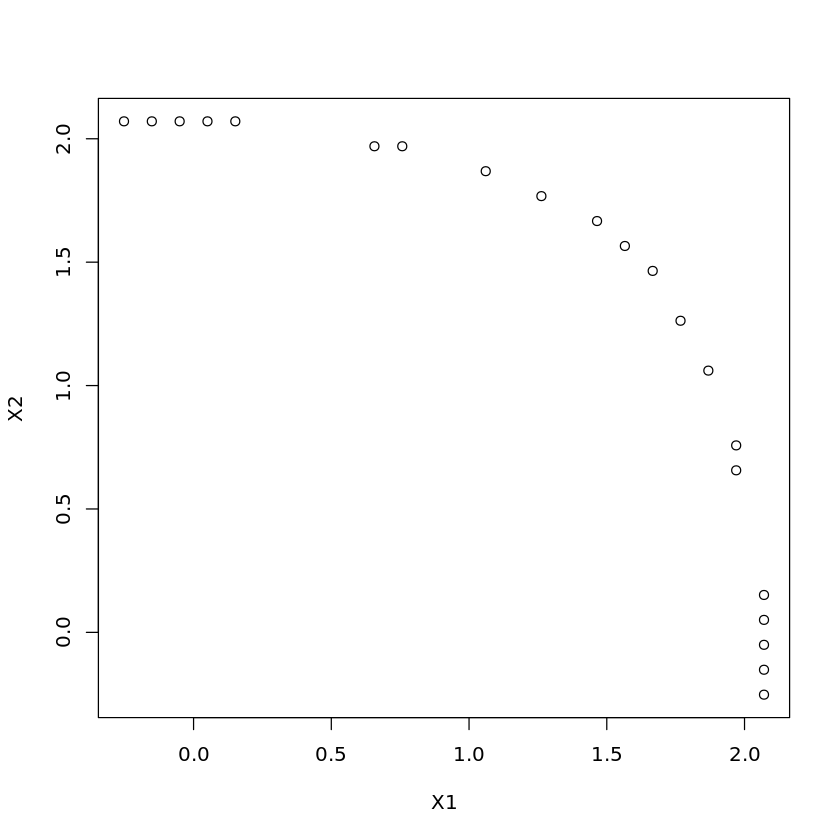

In [133]:
plot(isoline)

In [8]:
pts <- as.data.frame(with(isoline, list(X1 = approx(X1, xout = x1s)$y, 
    X2 = approx(X2, xout = x2s)$y)))

In [11]:
x1vals <- approx(x = isoline$X1, y = isoline$X2, xout = x1s)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


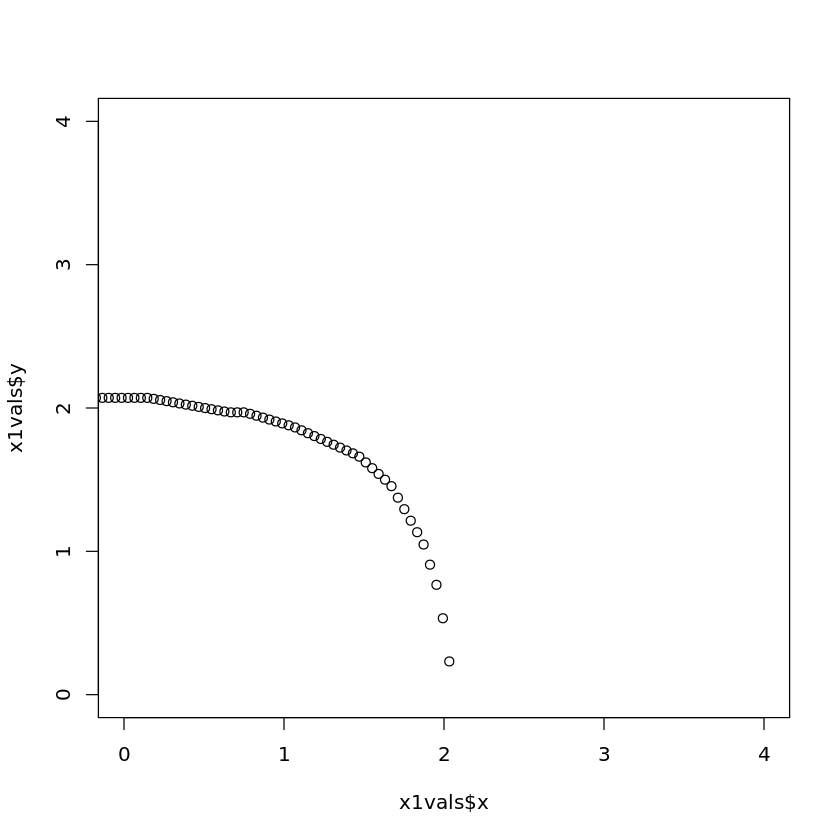

In [15]:
plot(x1vals, xlim = c(0,4), ylim = c(0,4))

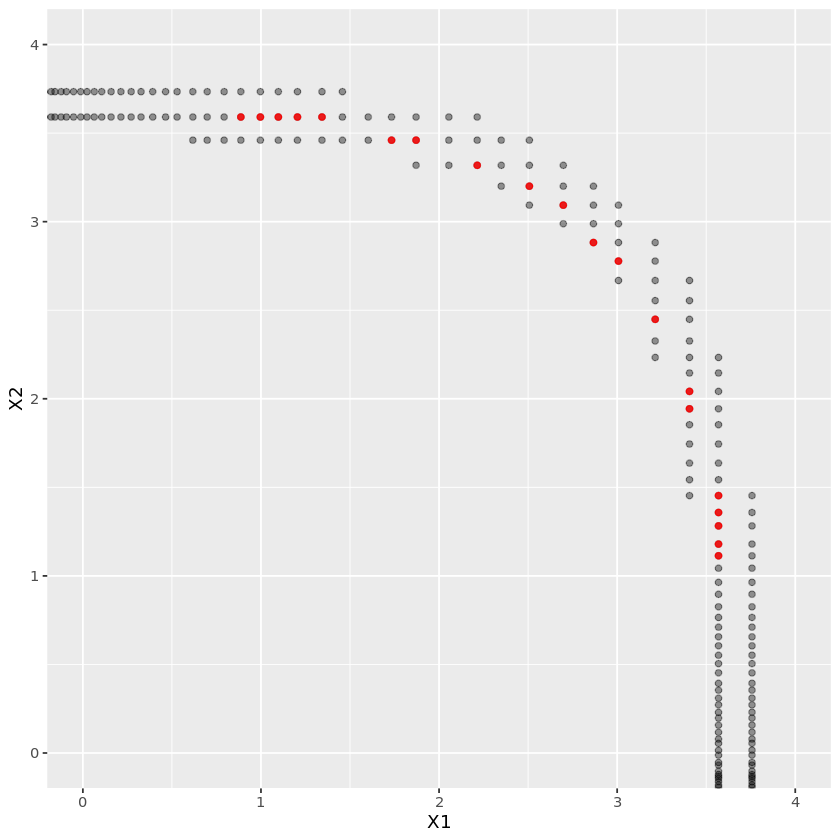

In [46]:
library(ggplot2)

a <- readRDS('/global/homes/j/jbbutler/isolines_uq/results/regions/projections/10000n_500B_0.05pbase_0.01pproj_0.5q_bivt_confregs/10_10000n_500B_0.05pbase_0.01pproj_0.5q_bivt_confregs.RData')
i <- 140

orig_plt <- ggplot() + 
geom_point(dat = a[[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = a[[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4))
orig_plt

In [45]:
a <- readRDS('/global/homes/j/jbbutler/isolines_uq/results/regions/projections/10000n_500B_0.05pbase_0.01pproj_0.5q_bivt_confregs/10_10000n_500B_0.05pbase_0.01pproj_0.5q_bivt_confregs.RData')
a[[3]]

[1] TRUE

### 8/16 experimenting with more efficient ways of drawing the base isolines

idea: impose a uniform grid for drawing the survival functions across resamples of the data, just so everything is consistent and the resolution of the resulting confidence regions don't depend on how extreme the observed data was. This is also beneficial because for the same grid, we can draw the isoline with a fixed tolerance and know it will work for all cases.

For projections, we can still draw the isolines on the projected grid, but it will be much less computationally expensive to do so, because the grid will be fixed to be 250 by 250 which we have already observed does not take that much time to run.

In [2]:
library(mvtnorm)
library(ggplot2)
library(ks)
n <- 15000
t_dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

In [3]:
surv_func1 <- kcde(t_dat, gridsize = 500, tail.flag = 'upper')
grid <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
surv_func2 <- kcde(t_dat, eval.points = grid, tail.flag = 'upper', gridsize = 500)

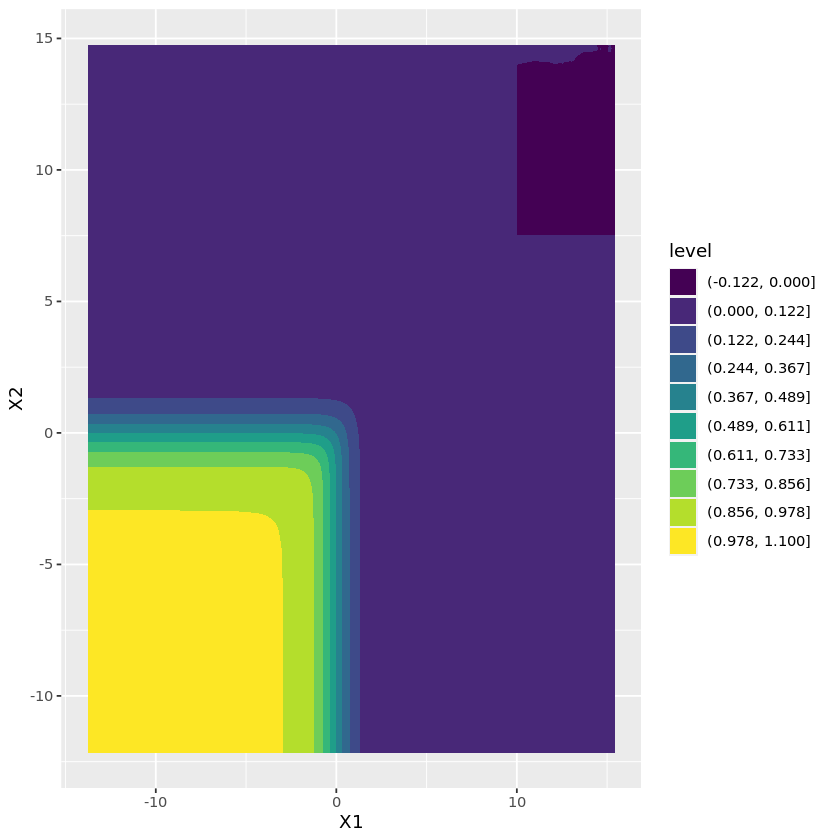

In [4]:
df <- expand.grid(X1 = surv_func1$eval.points[[1]], X2 = surv_func1$eval.points[[2]])
df <- data.frame(X1 = df$X1, X2 = df$X2, Z = as.vector(surv_func1$estimate))
ggplot(df) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

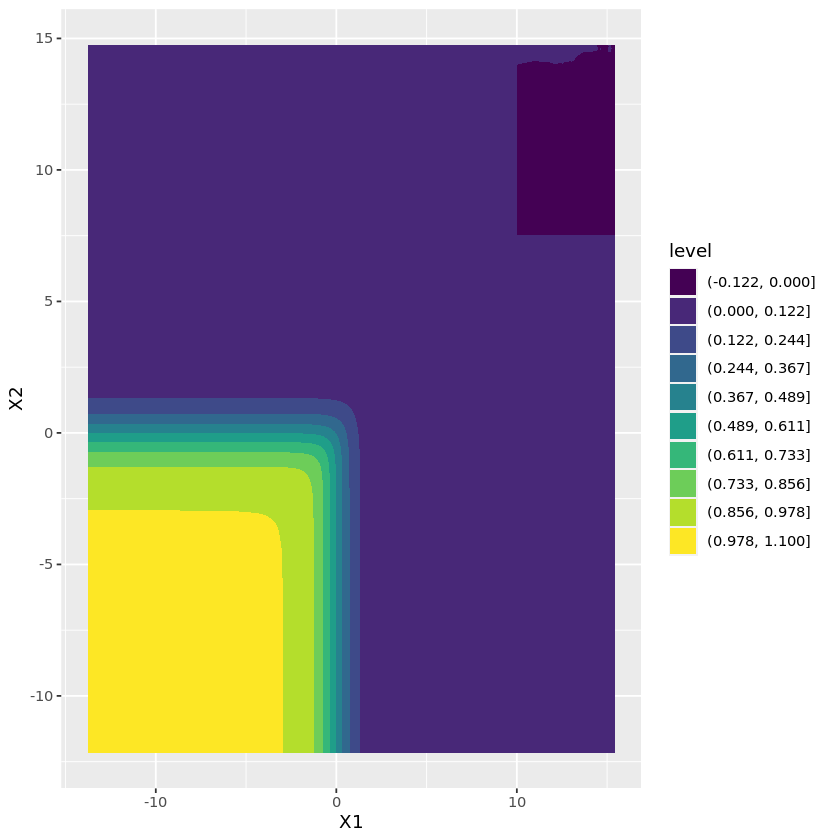

In [5]:
df <- data.frame(X1 = surv_func2$eval.point$X1, X2 = surv_func2$eval.point$X2, Z = as.vector(surv_func2$estimate))
ggplot(df) + geom_contour_filled(aes(x = X1, y = X2, z = Z), bins = 10)

### 8/16 Getting Base Confidence Regions/Isolines in a More Consistent/Efficient Way

Idea: draw the regions and isolines on a uniform grid (so you can reuse the same isoline and don't have to keep remaking it), and redraw the isolines as necessary for the projections but note this will take less time because the grid will be, say 250 by 250, which we have already demonstrated is feasible

In [284]:
library(mvtnorm)
library(ks)

In [285]:
lb <- -5
ub <- 5
gsize <- 250
grid <- expand.grid(X1 = seq(lb, ub, length.out = gsize), X2 = seq(lb, ub, length.out = gsize))

What to make the gridsize?

In [313]:
n <- 15000
t_dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

In [314]:
res <- 10^ceiling(log10((ub - lb)/gsize))
gridsize <- max((max(t_dat$X1) - min(t_dat$X1))/(res), (max(t_dat$X2) - min(t_dat$X2))/(res))
surv_func <- kcde(t_dat, tail.flag = 'upper', gridsize = round(gridsize), eval.points = grid)

In [315]:
p <- 0.05
alpha <- 0.05
B <- 100
beta_func <- function(n) 1/sqrt(n)
Zs <- rep(0, B)

In [316]:
hhat_vals <- as.vector(-surv_func$estimate) + p
deltamask <- abs(hhat_vals) <= beta_func(nrow(t_dat))

Doesn't really seem like there's any issue with making gridsize smaller in the bootstraps, so I will just keep it at this smaller value for computational efficiency. I will keep at 100, which I think is close to what the default value is. Can just say that we make this tradeoff for computational efficiency, don't notice much difference, and if there is bad results, etc. you can just try with less severe binning.

In [317]:
xmin = c(min(t_dat$X1), min(t_dat$X2))
xmax = c(max(t_dat$X1), max(t_dat$X2))

for (i in 1:B) {

    boot_samp <- t_dat %>% sample_frac(1, replace = TRUE)
    boot_surv_func <- kcde(boot_samp, eval.points = grid, gridsize = 100, tail.flag = 'upper', xmin = xmin, xmax = xmax)
    boot_hhat_vals <- -boot_surv_func$estimate + p
    Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask]))
}

bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
lower <- grid[hhat_vals > bhat,]
upper <- grid[hhat_vals >= -bhat,]

conf_region <- setdiff(upper, lower)

In [311]:
isoline <- drawBivtIsoline(p = p, grid = grid, tol = 0.001)

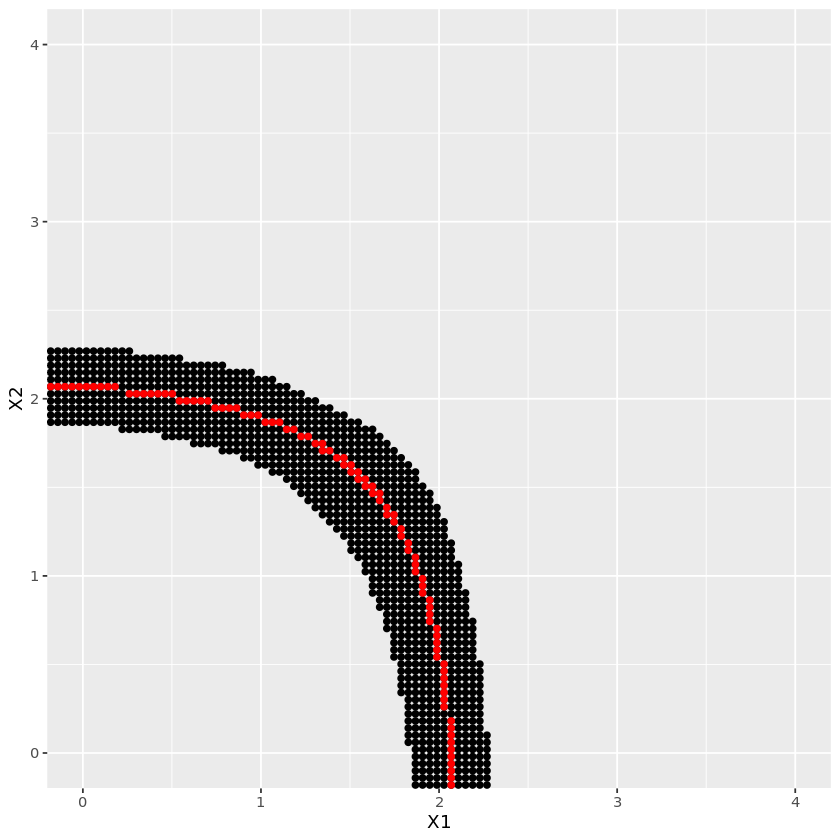

In [318]:
library(ggplot2)
ggplot() + geom_point(data = conf_region, aes(x = X1, y = X2)) + geom_point(data = isoline, aes(x = X1, y = X2), col = 'red') +  coord_cartesian(ylim=c(0, 4), xlim = c(0, 4))

Exploring more about what's going on here... I think making the gridsize so much higher works so well because it makes the estimate of the empirical cdf so much finer, so when you predict on some fixed grid it's more accurate to that grid. Otherwise I think it skews low, which is what we have been observing.

#### 8/22: making a key of tol parameters for different grid sizes/exceedence probabilities

In [22]:
grid <- expand.grid(X1 = seq(-10, 10, length.out = 250), X2 = seq(-10, 10, length.out = 250))

In [31]:
library(mvtnorm)
iso <- drawBivtIsoline(grid, tol = 0.00007, p = 0.001)

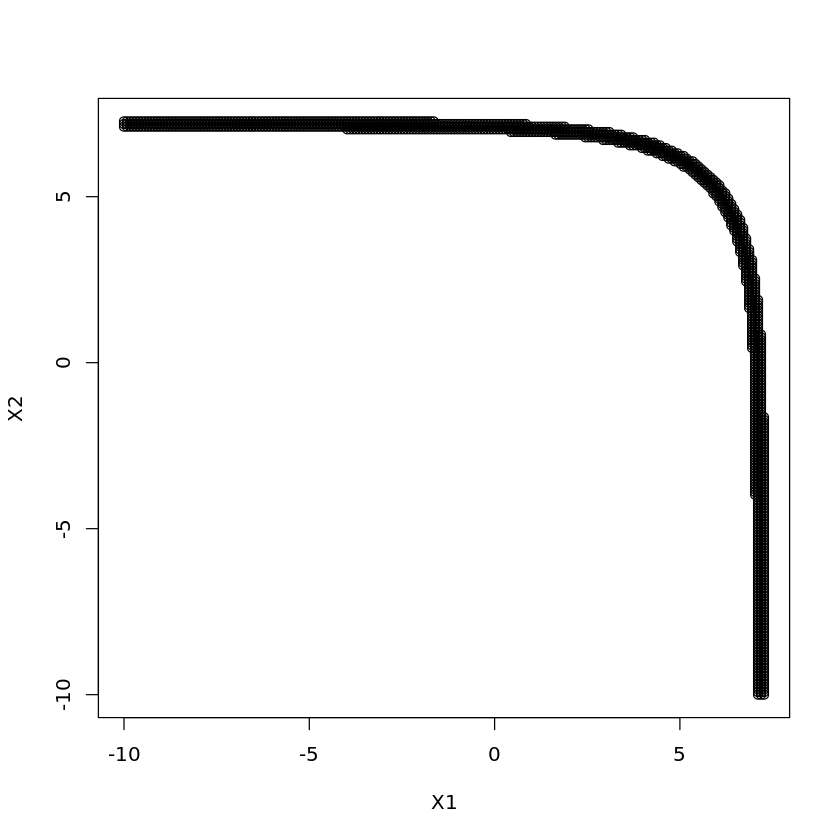

In [32]:
plot(iso)

#### 8/23: investigating possibly-weird behavior in the bivariate gaussian case

In [7]:
library(mvtnorm)

In [108]:
n <- 5000
B <- 500
ub <- 4
lb <- -4
p <- 0.05
alpha <- 0.05
beta_func <- function(n) (1/n)^(1/3)
gticks <- 250
res <- 10^floor(log10((ub - lb)/gticks))
dat <- data.frame(rmvnorm(n, mean = rep(0, 2), sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2)))
est_gsize <- round(max((max(dat$X1) - min(dat$X1))/(res), (max(dat$X2) - min(dat$X2))/(res)))
grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks), X2 = seq(lb, ub, length.out = gticks))
boot_gsize <- 250

In [109]:
xmin = c(min(dat$X1), min(dat$X2))
xmax = c(max(dat$X1), max(dat$X2))

surv_func <- kcde(dat, tail.flag = 'upper', gridsize = est_gsize, eval.points = grid, xmin = xmin, xmax = xmax)
hhat_vals <- -surv_func$estimate + p
deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

Zs <- rep(0, B)

for (i in 1:B) {

    boot_samp <- dat %>% sample_frac(1, replace = TRUE)
    boot_surv_func <- kcde(boot_samp, eval.points = grid, gridsize = boot_gsize,
                               tail.flag = 'upper', xmin = xmin, xmax = xmax)
    boot_hhat_vals <- -boot_surv_func$estimate + p
    Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask]))
    print(which.max(abs((boot_hhat_vals - hhat_vals)[deltamask])))
}

bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
lower <- grid[hhat_vals > bhat,]
upper <- grid[hhat_vals >= -bhat,]

conf_region <- setdiff(upper, lower)


[1] 8563
[1] 16589
[1] 14641
[1] 11777
[1] 15913
[1] 16127
[1] 11013
[1] 15507
[1] 16469
[1] 10475
[1] 16589
[1] 15407
[1] 9950
[1] 17548
[1] 14641
[1] 11892
[1] 18253
[1] 16019
[1] 11953
[1] 18372
[1] 15809
[1] 18334
[1] 10652
[1] 16798
[1] 16057
[1] 17115
[1] 11777
[1] 14455
[1] 15118
[1] 14461
[1] 13908
[1] 14641
[1] 16589
[1] 15814
[1] 16467
[1] 11168
[1] 14845
[1] 15115
[1] 16467
[1] 16822
[1] 6383
[1] 12393
[1] 15809
[1] 16811
[1] 19631
[1] 16469
[1] 18629
[1] 15115
[1] 17088
[1] 12833
[1] 17326
[1] 15115
[1] 13726
[1] 12833
[1] 12483
[1] 18318
[1] 13906
[1] 12922
[1] 14641
[1] 16467
[1] 10910
[1] 11777
[1] 13456
[1] 14926
[1] 16237
[1] 16382
[1] 20109
[1] 16019
[1] 17067
[1] 8819
[1] 13456
[1] 16237
[1] 16019
[1] 13907
[1] 15707
[1] 16467
[1] 10477
[1] 9957
[1] 16753
[1] 6392
[1] 12833
[1] 17067
[1] 13908
[1] 16832
[1] 16591
[1] 15408
[1] 23117
[1] 15811
[1] 16481
[1] 16237
[1] 10039
[1] 16753
[1] 5600
[1] 18368
[1] 16753
[1] 12922
[1] 16350
[1] 16617
[1] 14280
[1] 6391
[1] 1648

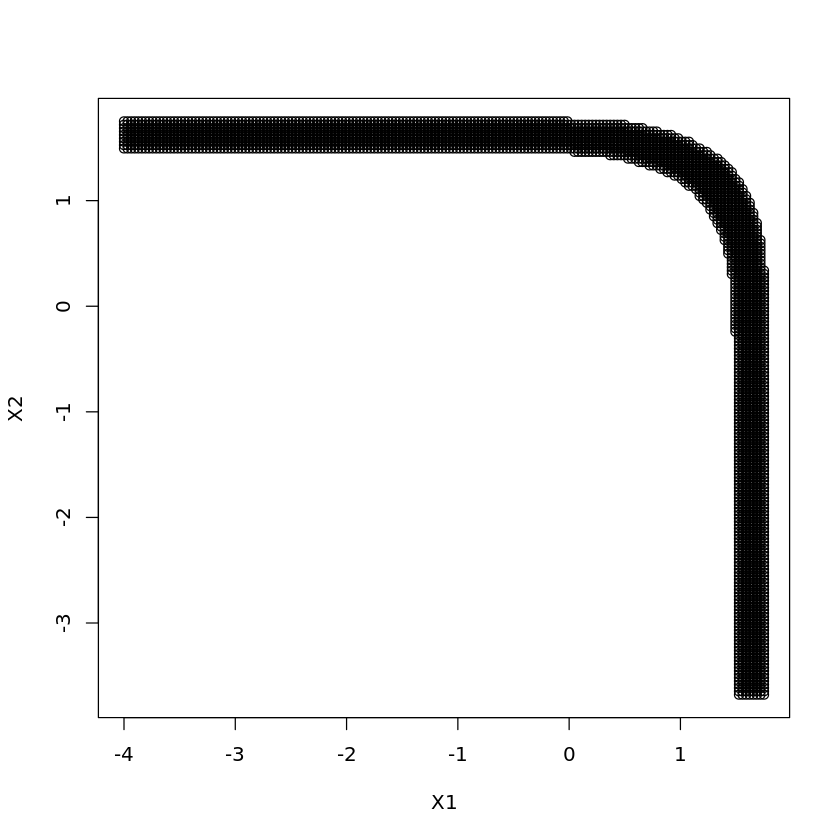

In [101]:
plot(grid[deltamask,])

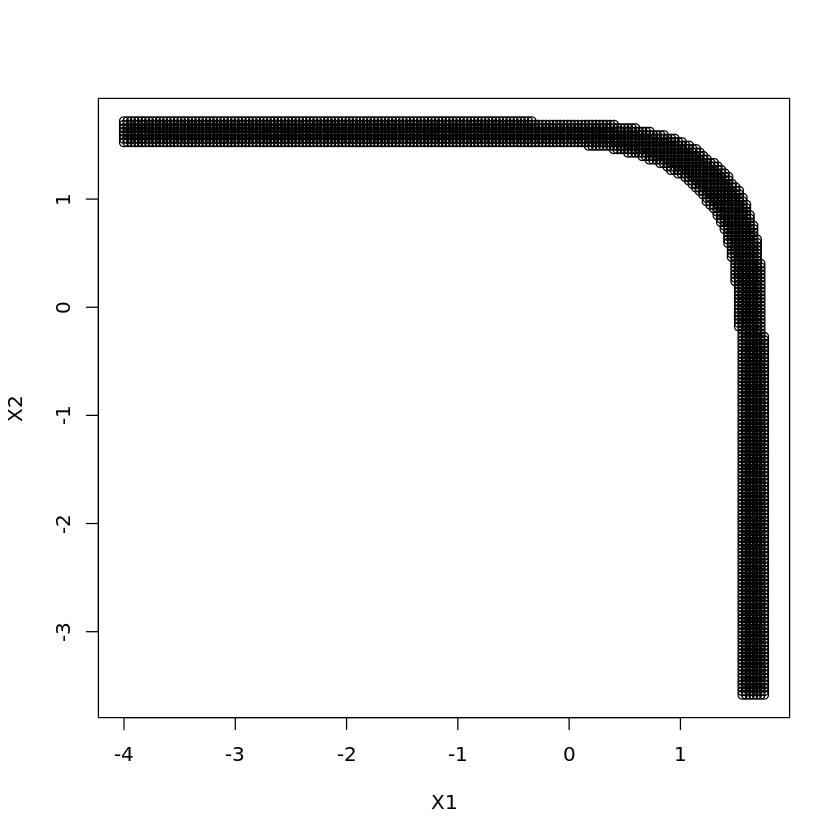

In [110]:
plot(conf_region)

In [93]:
boot_hhat_vals[deltamask][37]

[1] 0.05

In [88]:
hhat_vals[deltamask][37]

[1] -0.01168433

In [112]:
df <- data.frame(x = grid$X1, y = grid$X2, z = hhat_vals)

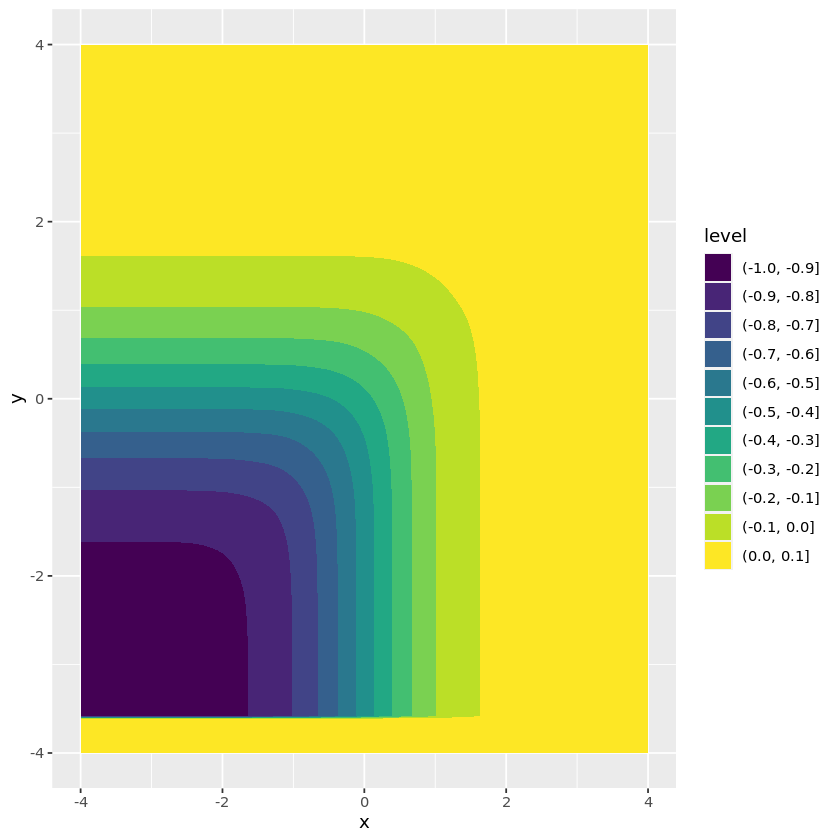

In [113]:
library(ggplot2)
ggplot(df) + geom_contour_filled(aes(x = x, y = y, z = z))

#### 8/24: Figuring out once-and-for-all what is going on with this `kcde` function

changing `xmin` and `xmax`

In [9]:
library(mvtnorm)
library(ks)
library(ggplot2)

In [ ]:
dat <- data.frame(rmvnorm(n, mean = rep(0, 2), sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2)))

In [73]:
n <- 20000
B <- 500
ub <- 4
lb <- -4
p <- 0.05
alpha <- 0.05
beta_func <- function(n) (1/n)^(1/3)
gticks <- 250
res <- 10^ceiling(log10((ub - lb)/gticks))
est_gsize <- round(max((max(dat$X1) - min(dat$X1))/(res), (max(dat$X2) - min(dat$X2))/(res)))
grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks), X2 = seq(lb, ub, length.out = gticks))
boot_gsize <- 100

In [70]:
xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))

surv_func <- kcde(dat, tail.flag = 'upper', gridsize = est_gsize, eval.points = grid, xmin = xmin, xmax = xmax)
hhat_vals <- -surv_func$estimate + p
deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

Zs <- rep(0, B)

for (i in 1:B) {

    boot_samp <- dat %>% sample_frac(1, replace = TRUE)
    boot_surv_func <- kcde(boot_samp, eval.points = grid, gridsize = boot_gsize,
                               tail.flag = 'upper', xmin = xmin, xmax = xmax)
    boot_hhat_vals <- -boot_surv_func$estimate + p
    Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask]))
}

bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
lower <- grid[hhat_vals > bhat,]
upper <- grid[hhat_vals >= -bhat,]

conf_region <- setdiff(upper, lower)

In [67]:
tol <- 0.0007
isoline <- drawBivGaussIsoline(p = p, grid = grid, tol = tol)

Using `ceiling` instead of `floor`

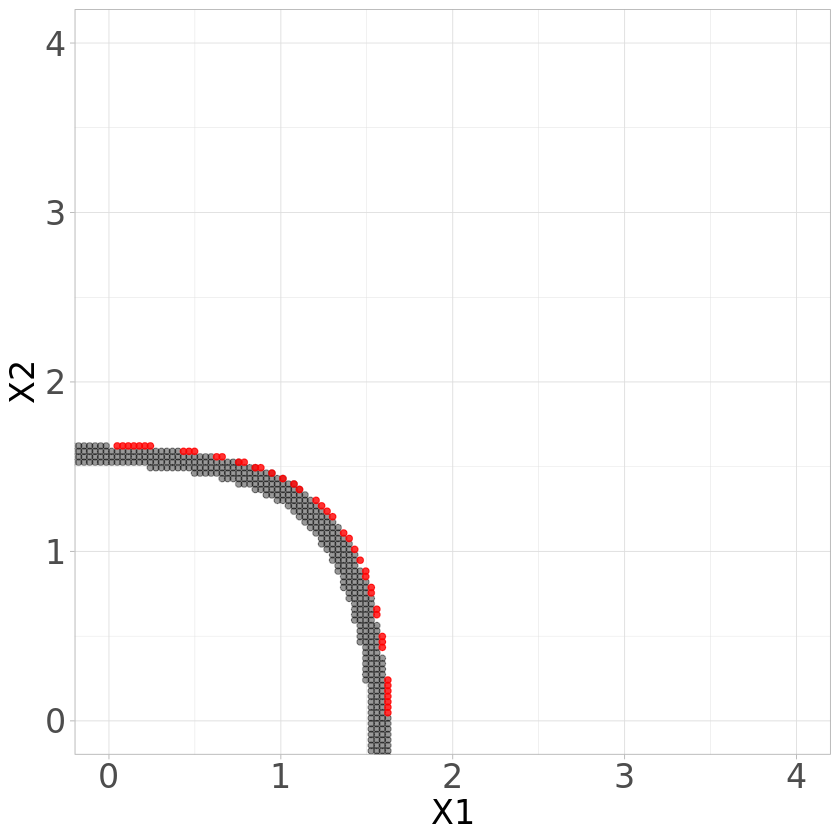

In [68]:
orig_plt <- ggplot() + 
geom_point(dat = conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

Using `floor` instead of `ceiling`

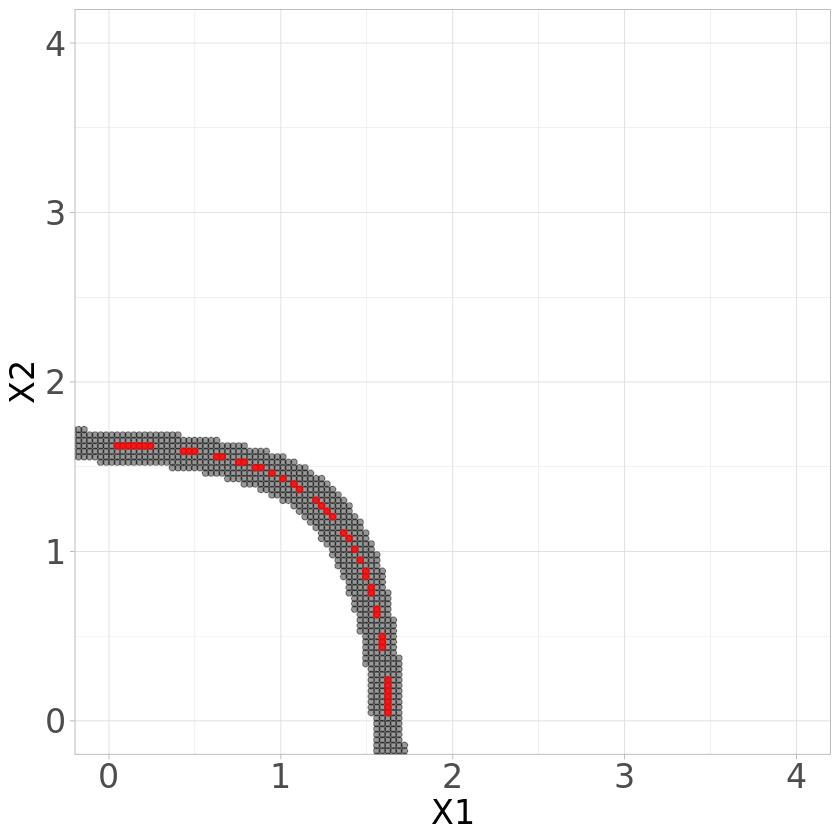

In [71]:
orig_plt <- ggplot() + 
geom_point(dat = conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

seems like the issue is that the resolution for the binned grid is too small when doing an empirical estimation of the cdf, so when using the predict function I guess it just doesn't predict as well, especially on a grid whose resolution is finer than the resolution of the binned grid.

Using `est_gsize = 250`, the same as the resolution of the grid we are projecting on

In [84]:
n <- 20000
B <- 500
ub <- 4
lb <- -4
p <- 0.05
alpha <- 0.05
beta_func <- function(n) (1/n)^(1/3)
gticks <- 250
est_gsize <- 300
grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks), X2 = seq(lb, ub, length.out = gticks))
boot_gsize <- 100

In [85]:
xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))

surv_func <- kcde(dat, tail.flag = 'upper', gridsize = est_gsize, eval.points = grid, xmin = xmin, xmax = xmax)
hhat_vals <- -surv_func$estimate + p
deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

Zs <- rep(0, B)

for (i in 1:B) {

    boot_samp <- dat %>% sample_frac(1, replace = TRUE)
    boot_surv_func <- kcde(boot_samp, eval.points = grid, gridsize = boot_gsize,
                               tail.flag = 'upper', xmin = xmin, xmax = xmax)
    boot_hhat_vals <- -boot_surv_func$estimate + p
    Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask]))
}

bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
lower <- grid[hhat_vals > bhat,]
upper <- grid[hhat_vals >= -bhat,]

conf_region <- setdiff(upper, lower)

In [86]:
tol <- 0.0007
isoline <- drawBivGaussIsoline(p = p, grid = grid, tol = tol)

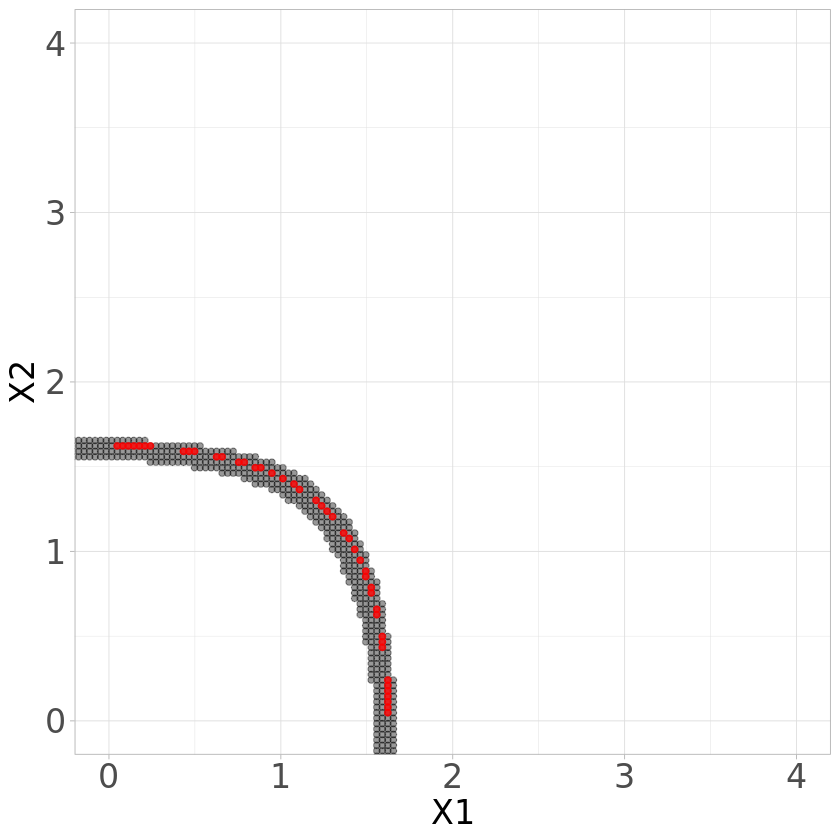

In [87]:
orig_plt <- ggplot() + 
geom_point(dat = conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [108]:
xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))

#### Final Strategy/Implementation

In [123]:
dat <- data.frame(rmvnorm(n, mean = rep(0, 2), sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2)))

In [124]:
n <- 20000
B <- 500
ub <- 3
lb <- -3
p <- 0.05
alpha <- 0.05
beta_func <- function(n) (1/n)^(1/3)
gticks <- 200

xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))

res <- 10^floor(log10((ub - lb)/gticks))
est_gsize <- round(max((xmax - xmin)/res))
grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks), X2 = seq(lb, ub, length.out = gticks))
boot_gsize <- 100

In [125]:
surv_func <- kcde(dat, tail.flag = 'upper', gridsize = est_gsize, eval.points = grid, xmin = xmin, xmax = xmax)
hhat_vals <- -surv_func$estimate + p
deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

Zs <- rep(0, B)

for (i in 1:B) {

    boot_samp <- dat %>% sample_frac(1, replace = TRUE)
    boot_surv_func <- kcde(boot_samp, eval.points = grid, gridsize = boot_gsize,
                               tail.flag = 'upper', xmin = xmin, xmax = xmax)
    boot_hhat_vals <- -boot_surv_func$estimate + p
    Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask]))
}

bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
lower <- grid[hhat_vals > bhat,]
upper <- grid[hhat_vals >= -bhat,]

conf_region <- setdiff(upper, lower)

In [126]:
tol <- 0.0007
isoline <- drawBivGaussIsoline(p = p, grid = grid, tol = tol)

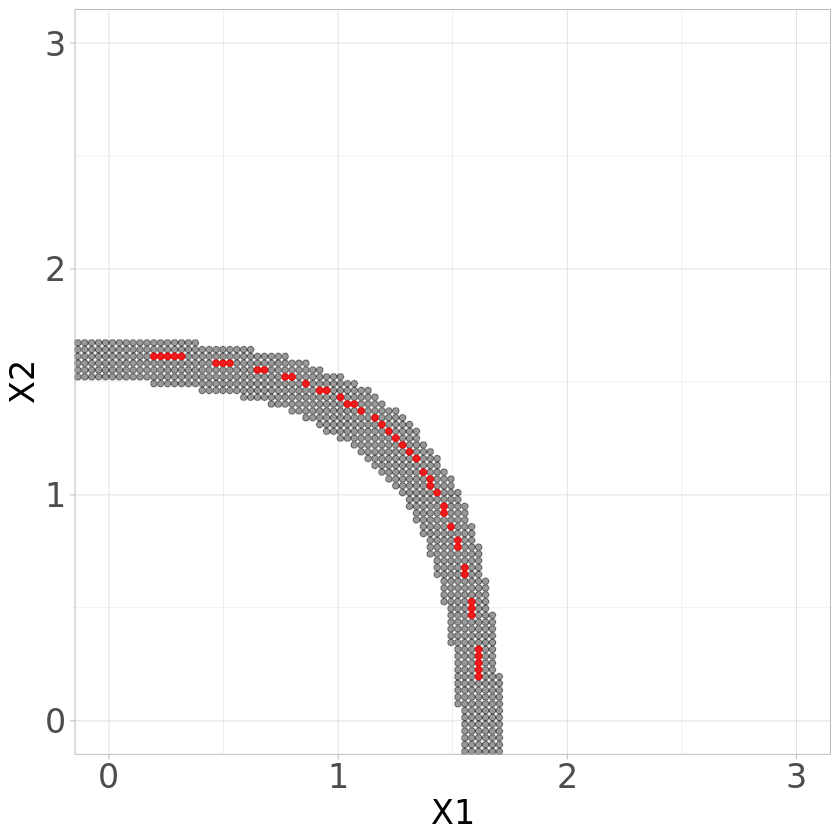

In [127]:
orig_plt <- ggplot() + 
geom_point(dat = conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 3), xlim = c(0, 3)) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### Can't believe I'm still hung up on this, but I'm going to deal with this one final time

In [8]:
library(mvtnorm)
library(ks)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [35]:
n <- 20000
dat <- data.frame(rmvnorm(n, mean = rep(0, 2), sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2)))
dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

In [44]:
B <- 500
ub <- 3
lb <- -3
p <- 0.05
alpha <- 0.05
beta_func <- function(n) (1/n)^(1/3)
gticks <- 250

xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))

est_gsize <- 500
grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks), X2 = seq(lb, ub, length.out = gticks))
boot_gsize <- 100

In [45]:
surv_func <- kcde(dat, tail.flag = 'upper', gridsize = est_gsize, eval.points = grid, xmin = xmin, xmax = xmax)
hhat_vals <- -surv_func$estimate + p
deltamask <- abs(hhat_vals) <= beta_func(nrow(dat))

Zs <- rep(0, B)

for (i in 1:B) {

    boot_samp <- dat %>% sample_frac(1, replace = TRUE)
    boot_surv_func <- kcde(boot_samp, eval.points = grid, gridsize = boot_gsize,
                               tail.flag = 'upper', xmin = xmin, xmax = xmax)
    boot_hhat_vals <- -boot_surv_func$estimate + p
    Zs[i] <- max(abs((boot_hhat_vals - hhat_vals)[deltamask]))
}

bhat <- as.numeric(quantile(Zs, probs = 1 - alpha))
lower <- grid[hhat_vals > bhat,]
upper <- grid[hhat_vals >= -bhat,]

conf_region <- setdiff(upper, lower)

In [42]:
tol <- 0.0007
isoline <- drawBivtIsoline(p = p, grid = grid, tol = tol)

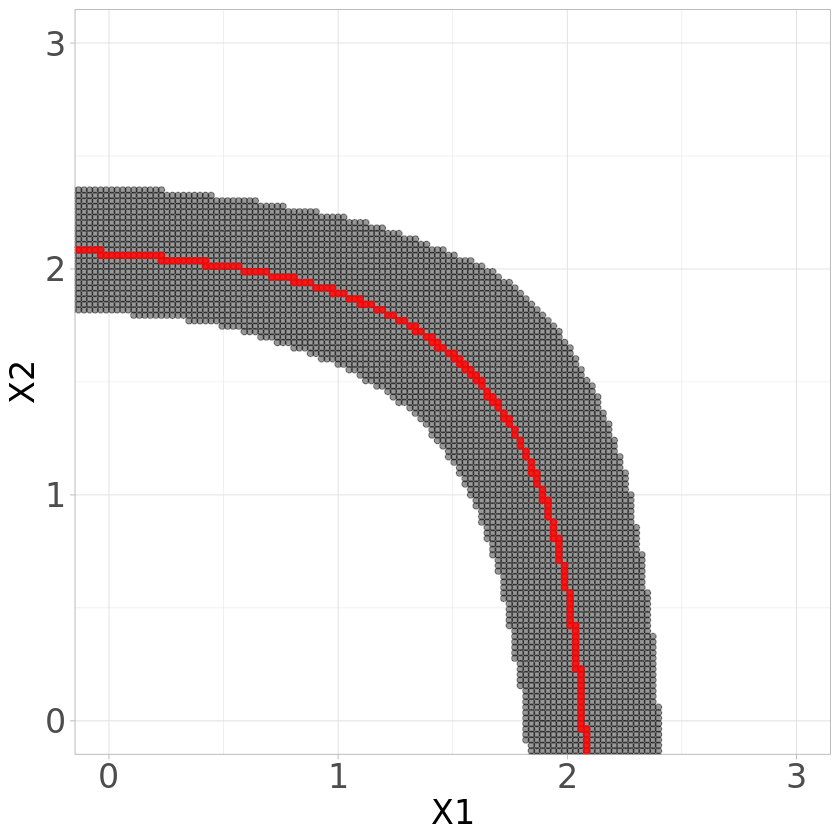

In [46]:
orig_plt <- ggplot() + 
geom_point(dat = conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 3), xlim = c(0, 3)) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### Runtime of projection code for asymptotic independent case: why is it taking so long?

In [175]:
res_path <- '/global/cscratch1/sd/jbbutler/sims/regions/'
base_path <- paste0(res_path, 'bases/')
proj_path <- paste0(res_path, 'projections/')

In [176]:
i <- 300
res <- readRDS(paste0(base_path, '20000n_500B_0.05pbase_0.25q_bivgauss_confregs/',i,'_20000n_500B_0.05pbase_0.25q_bivgauss_confregs.RData'))
out <- projectBaseRegion(res$orig_out, 0.01, asympIndep = TRUE)


In [177]:
nrow(out$proj_grid)

[1] 1414075

In [178]:
dat <- res$orig_out$data
n <- nrow(dat)
base_region <- res$orig_out$conf_region
base_p <- res$orig_out$p
mar1Prop=0.03
mar2Prop=0.03
mar1Width=0.01
mar2Width=0.01

In [179]:
gpdOut1 <- gpd.fit(dat[,1], threshold = quantile(dat[,1], probs = 1 - mar1Prop), show = F)
gpdOut2 <- gpd.fit(dat[,2], threshold = quantile(dat[,2], probs = 1 - mar2Prop), show = F)
regionFrec <- cbind(-1/log(transMar(base_region[,1], dat, 1, mar1Prop, mar1Width, gpdOut1)),
                                                     -1/log(transMar(base_region[,2], dat, 2, mar2Prop, mar2Width, gpdOut2)))

In [180]:
beta <- 200
etaProp <- 0.02
proj_p <- 0.01

In [194]:
u <- f <- matrix(ncol = ncol(dat), nrow = nrow(dat))
u[,1] <- transMar(dat[,1], dat, 1, mar1Prop, mar1Width, gpdOut1)
u[,2] <- transMar(dat[,2], dat, 2, mar2Prop, mar2Width, gpdOut2)

f[,1] <- -1/log(u[,1])
f[,2] <- -1/log(u[,2])

#estimate eta
minVec <- apply(f, 1, min)
sl <- sort.list(minVec, decreasing = T)
k <- round(n * etaProp)
keep <- sl[1:k]
etaHat <- sum( log(minVec[keep]) - log(minVec[keep[k]]) )/k

regionAng <- regionFrec[,1]/(regionFrec[,1] + regionFrec[,2])

#smooth eta
weight1 <- 1 - regionAng^beta
smoothEta1 <- weight1*etaHat + (1 - weight1)*1
weight2 <- 1 - (1 - regionAng)^beta
smoothEta2 <- weight2*etaHat + (1 - weight2)*1

#project to desired level
multiplier <- cbind((base_p/proj_p)^smoothEta1, (base_p/proj_p)^smoothEta2)
projregionFrec <- regionFrec*multiplier
#projregionFrec <- regionFrec*2

In [195]:
projregionU <- exp(-1/projregionFrec)

In [196]:
projregion <- data.frame(cbind(invTransMar(projregionU[,1], dat, 1, mar1Prop, mar1Width, gpdOut1),
                                                invTransMar(projregionU[,2], dat, 2, mar2Prop, mar2Width, gpdOut2) ))

In [200]:
nrow(out$proj_grid %>% filter(X1 >= 1, X2 >= 1))

[1] 1181719

In [216]:
length(unique(round(projregion, 2)$X2))

[1] 172

let't just implement a

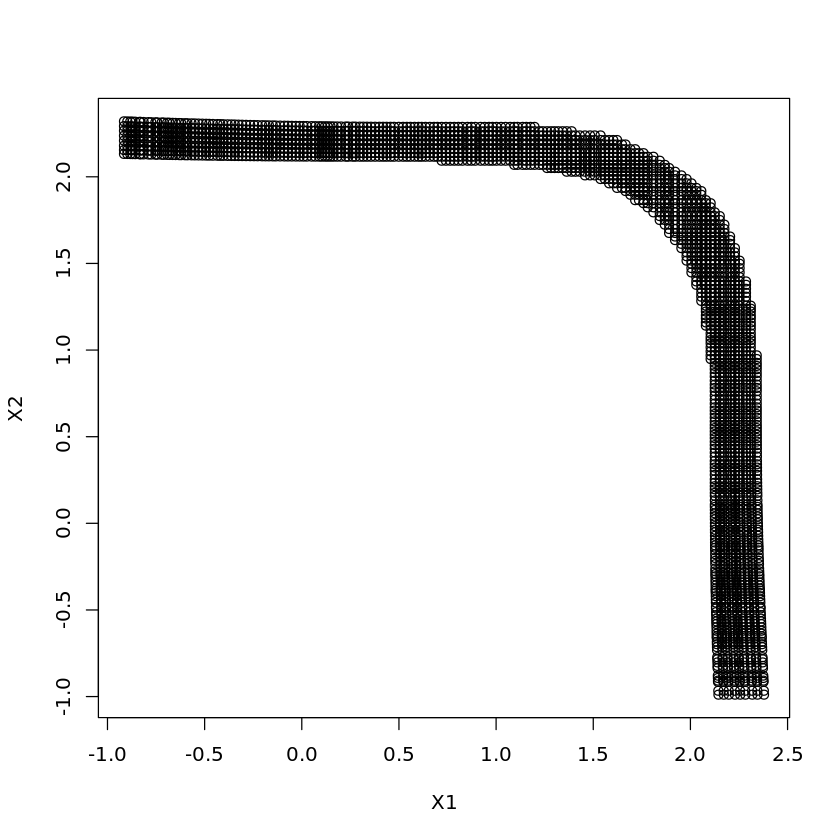

In [218]:
plot(projregion)

In [144]:
i <- 300
res <- readRDS(paste0(base_path, '20000n_500B_0.05pbase_0.25q_bivt_confregs/',i,'_20000n_500B_0.05pbase_0.25q_bivt_confregs.RData'))
out <- projectBaseRegion(res$orig_out, 0.01, asympIndep = FALSE)

In [147]:
nrow(out$proj_grid)

[1] 62500

In [148]:
nrow(res$orig_out$grid)

[1] 62500

## 9/12: Remaining Issues

1. Maybe an issue with the area coordinate systems?
2. Extending the projected regions back to the axes, is this valid? Why is the projection method not extending back (I think it was doing it anyway)?

In [10]:
library(mvtnorm)
ns <- c(3000)
B <- 500
alpha <- 0.05
p <- 0.005
q <- 1/4
asympIndep <- FALSE
beta_func <- function(n) (1/n)^q
n_iter <- 10

lb <- -7
ub <- 7
gticks <- 250

est_gsize <- 500
grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))
boot_gsize = 100
tol <- 0.00008

if (asympIndep) {
    isoline <- drawBivGaussIsoline(p = p, grid = grid, tol = tol)
} else {
    isoline <- drawBivtIsoline(p = p, grid = grid, tol = tol)
}

isoline_multi <- sfg_multilinestring(isoline)

In [12]:
dat <- data.frame(rmvt(ns[1], sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))

base_out <- drawBaseRegion(dat, grid, est_gsize, boot_gsize, xmin, xmax, alpha, p, beta_func, B)